We have census data of India, and we need to do some processs on that data till PCA, this is the task 

In [1]:
#export some important library 

import pandas as pd 
import numpy as np
import matplotlib as matplt


In [2]:
df = pd.read_csv('PCA India Data_Census_project_csv_original.csv')

In [3]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df.shape

(640, 61)

as we can see, we have 640 raws and 61 columns, for this we need to do PCA process cause '61' columns it is big number 
 
                                        LET'S  EXPLORE MORE  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

as we can see no bad(anomaly) data, no null values are here in this data set, let's see more 

In [6]:
df['State'].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [7]:
df['Area Name'].value_counts()

Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: Area Name, Length: 635, dtype: int64

In [8]:
#let's check outliers and try to figure it out the problem 
import seaborn as sns
import matplotlib.pyplot as plt


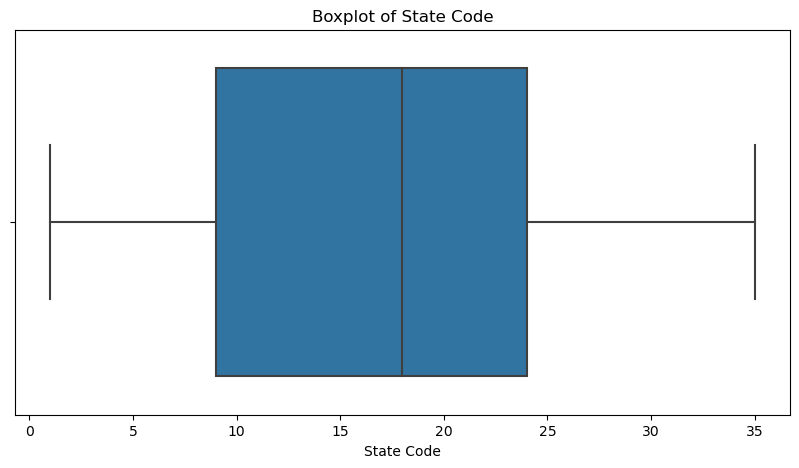

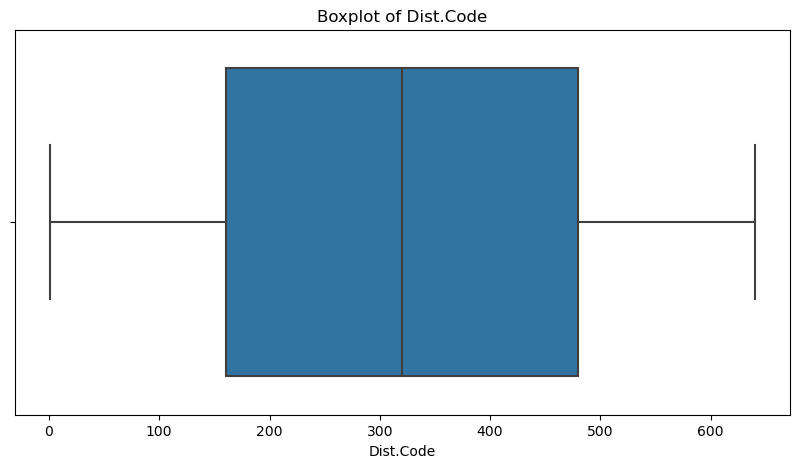

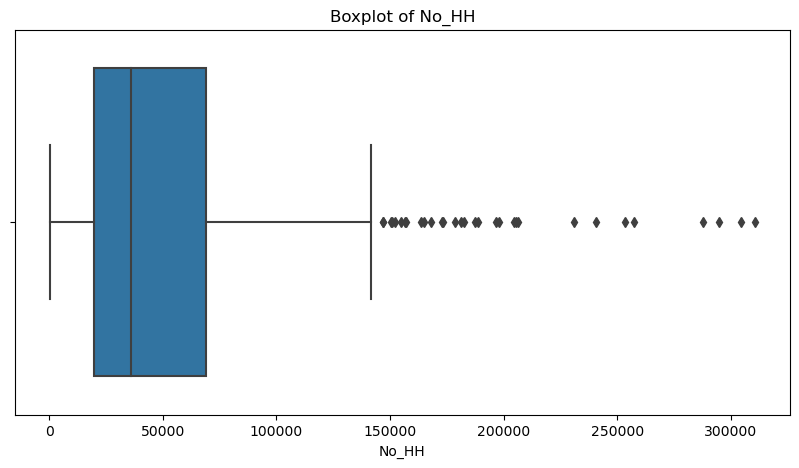

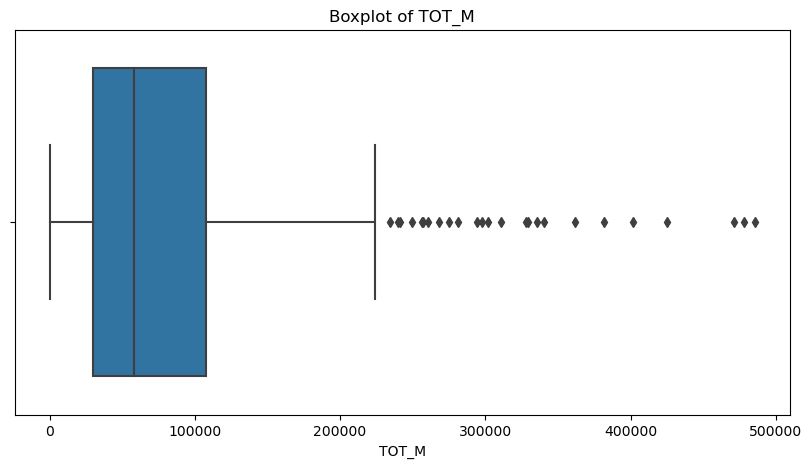

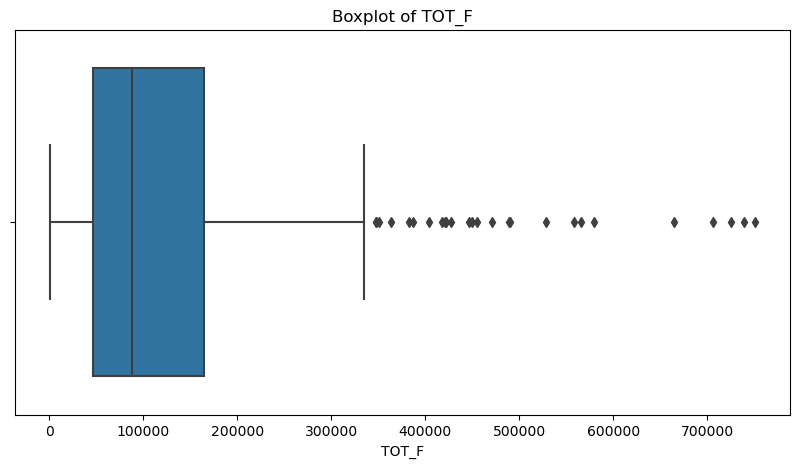

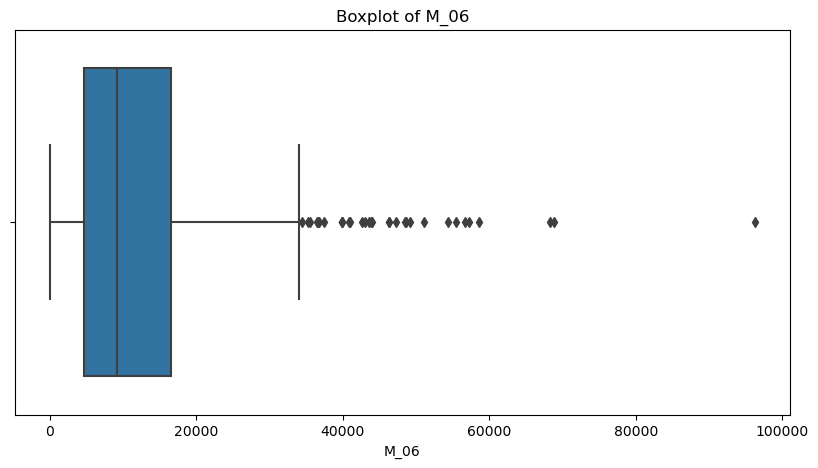

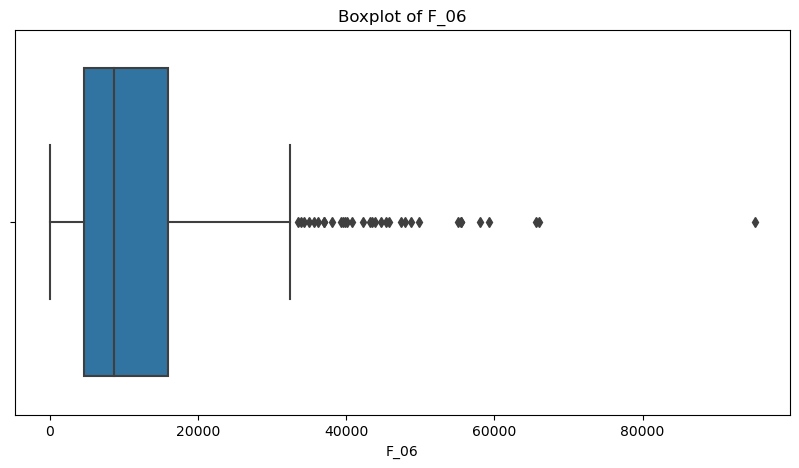

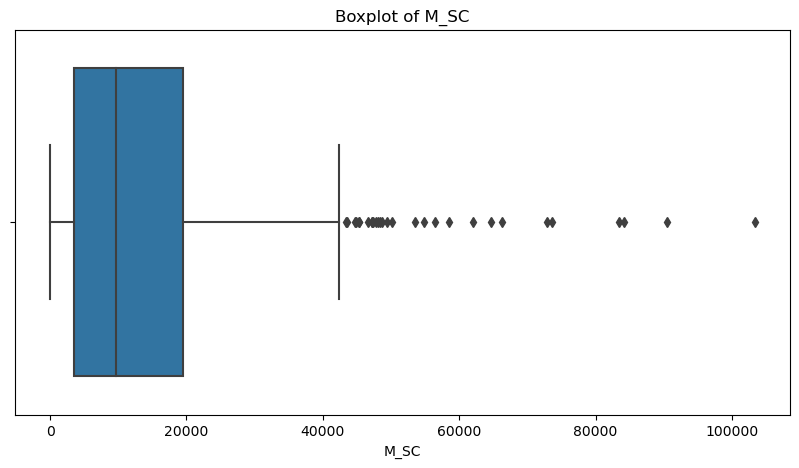

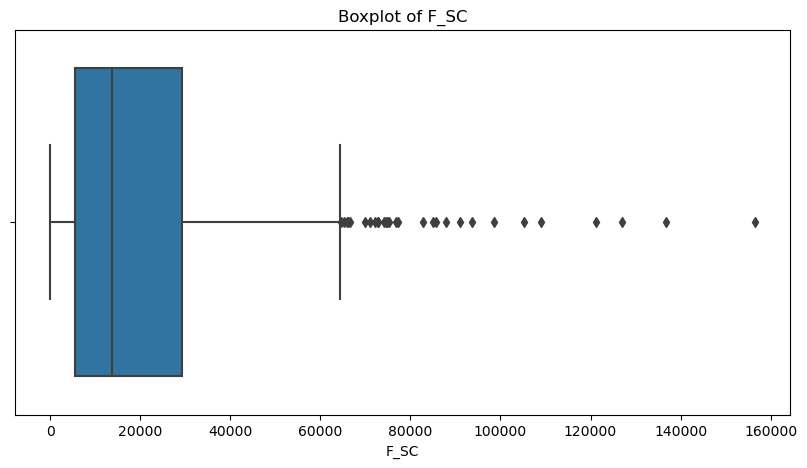

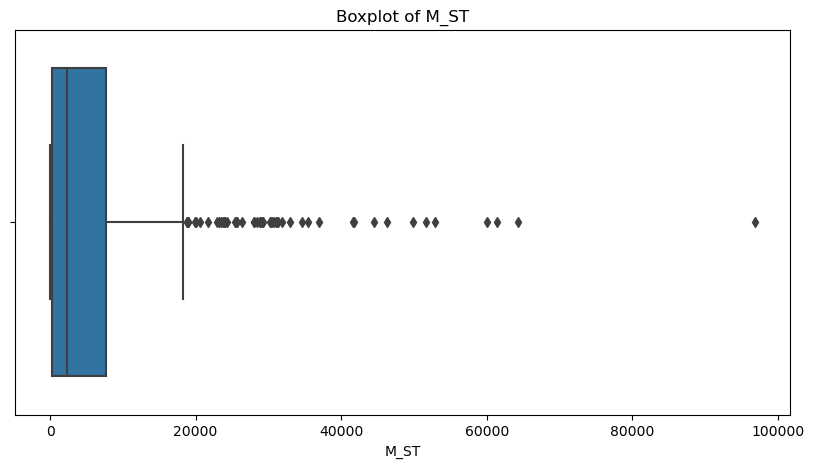

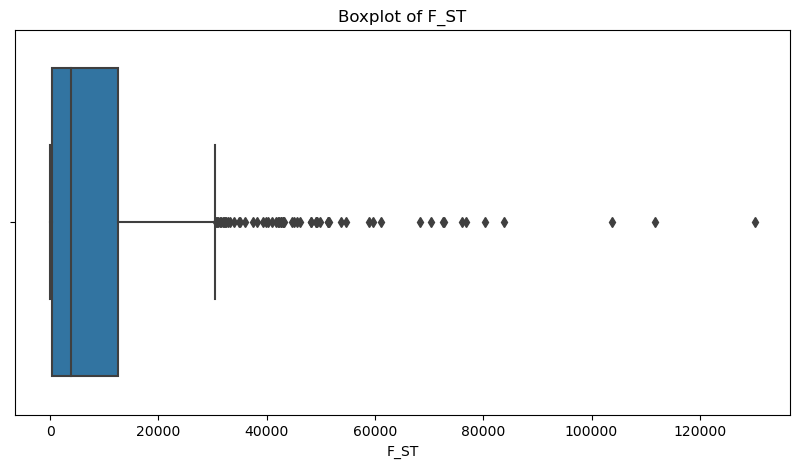

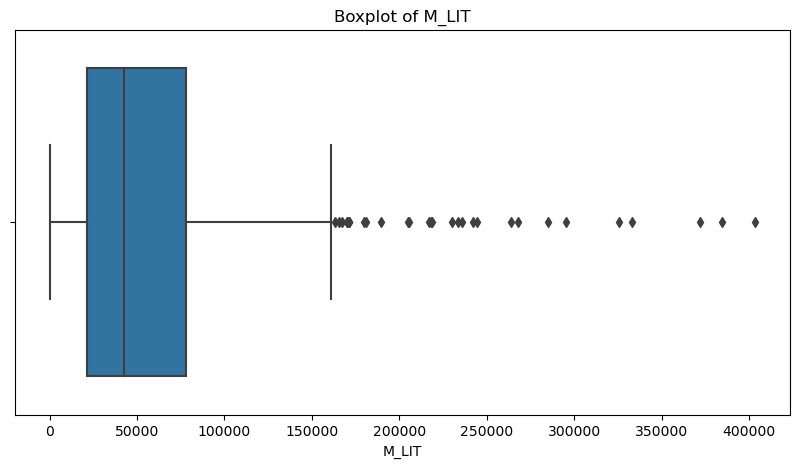

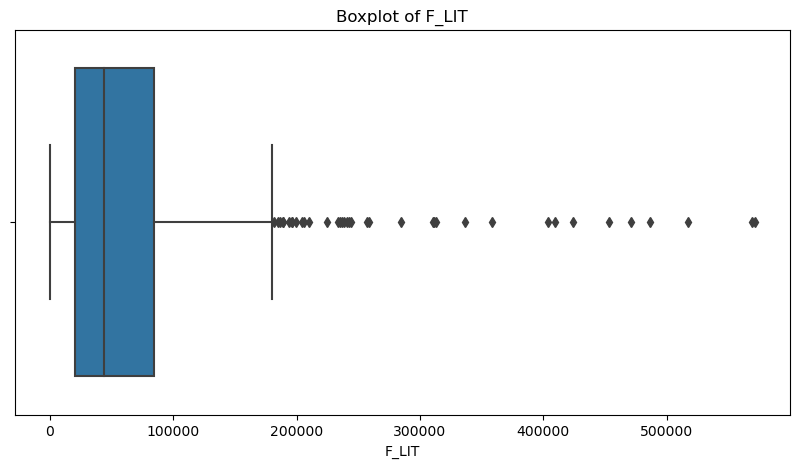

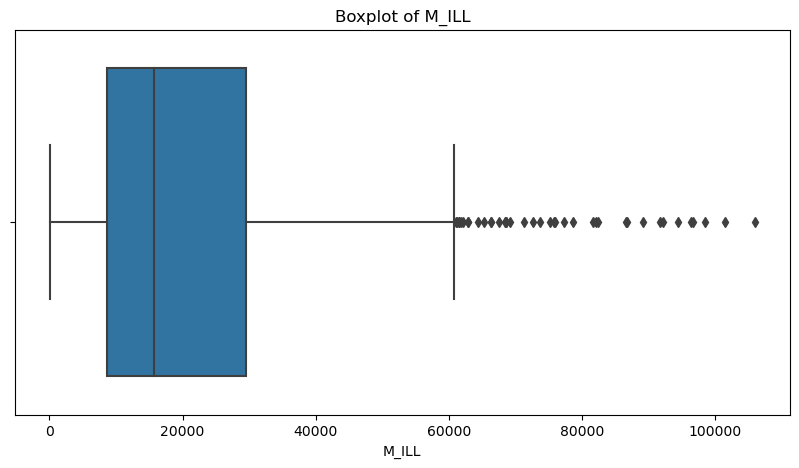

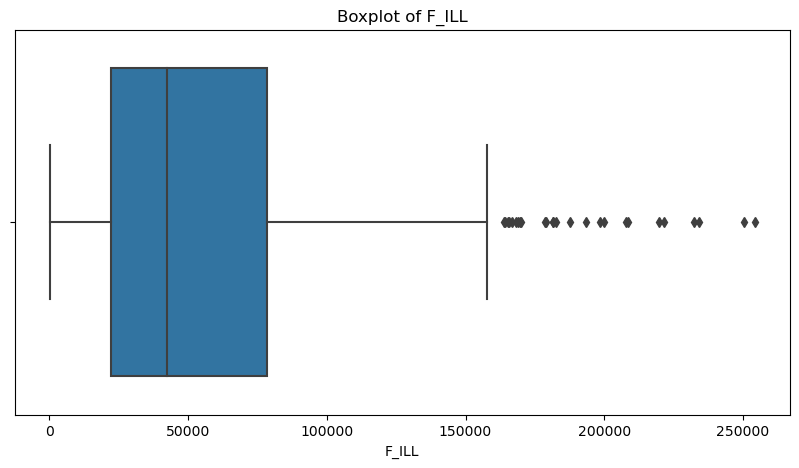

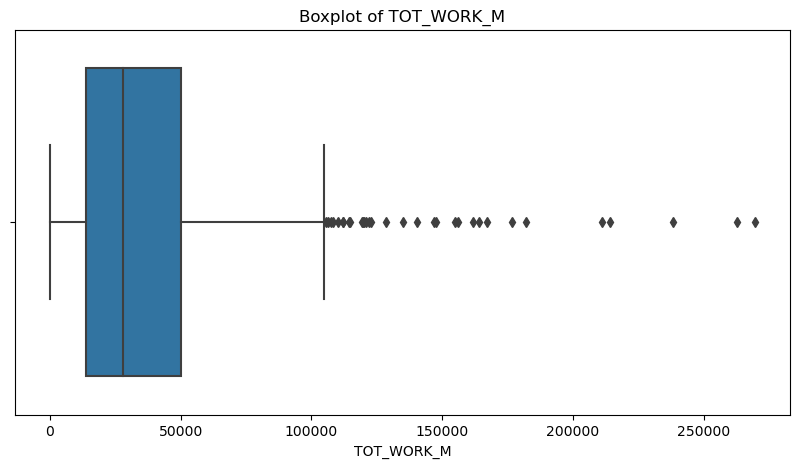

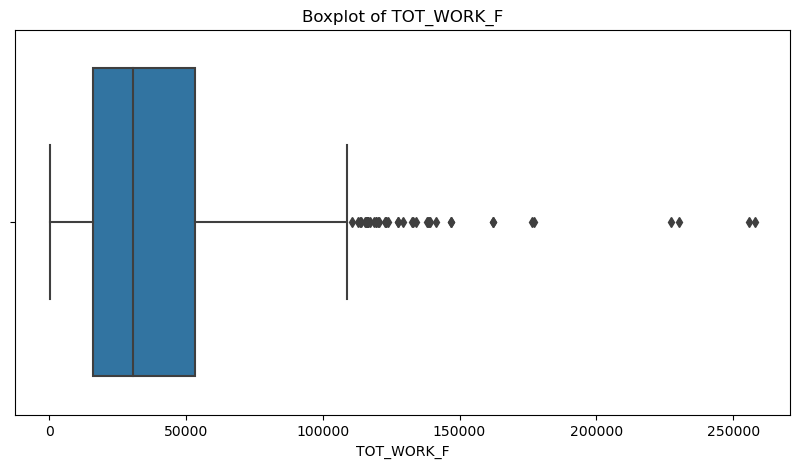

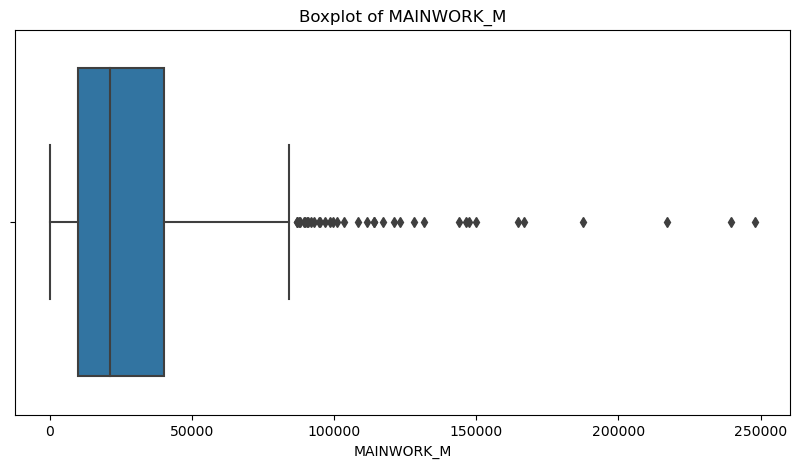

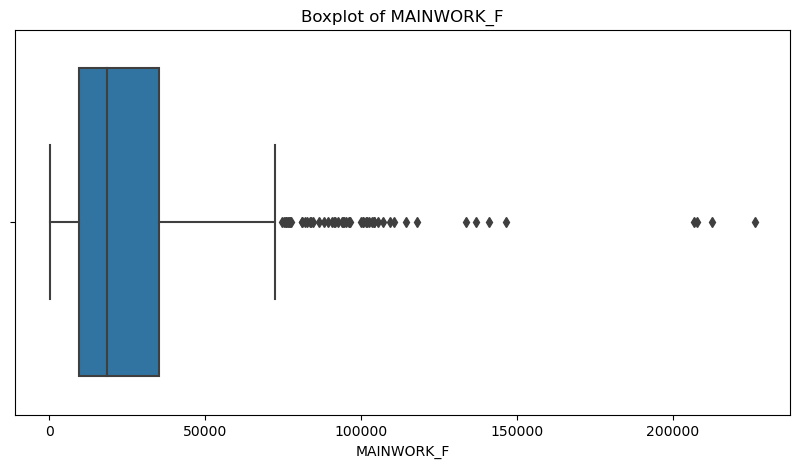

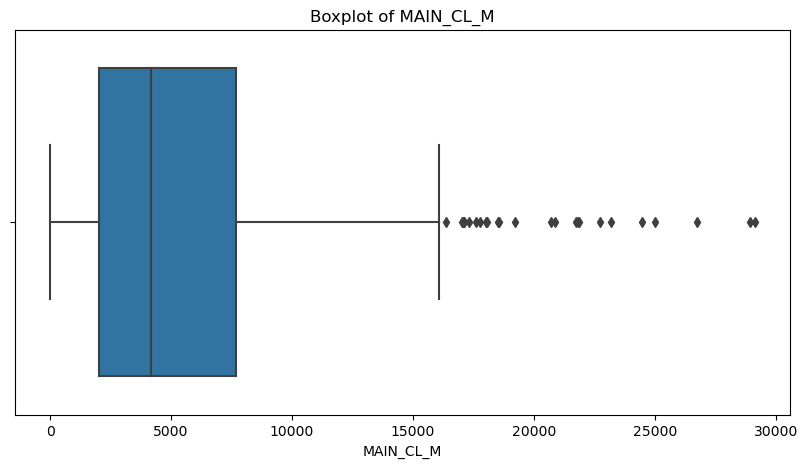

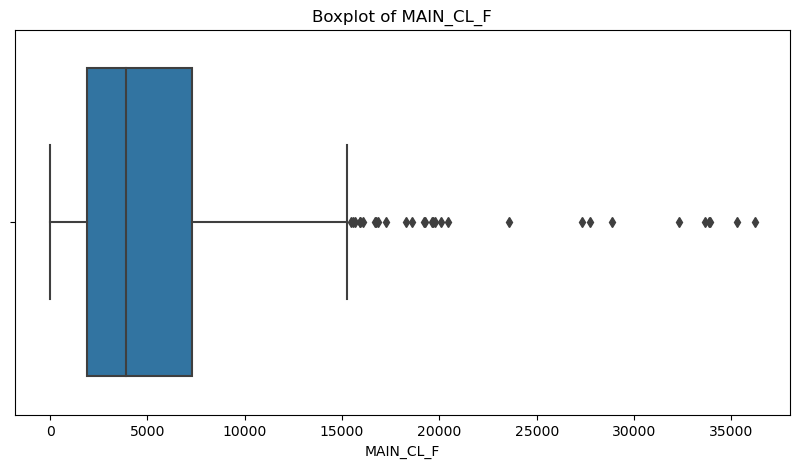

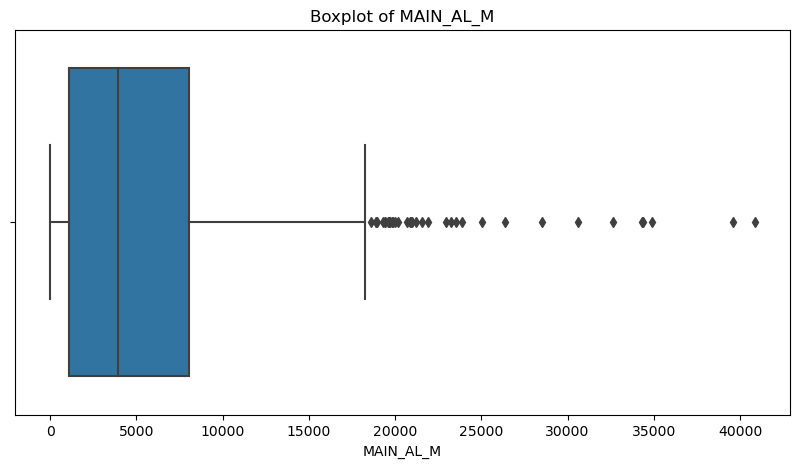

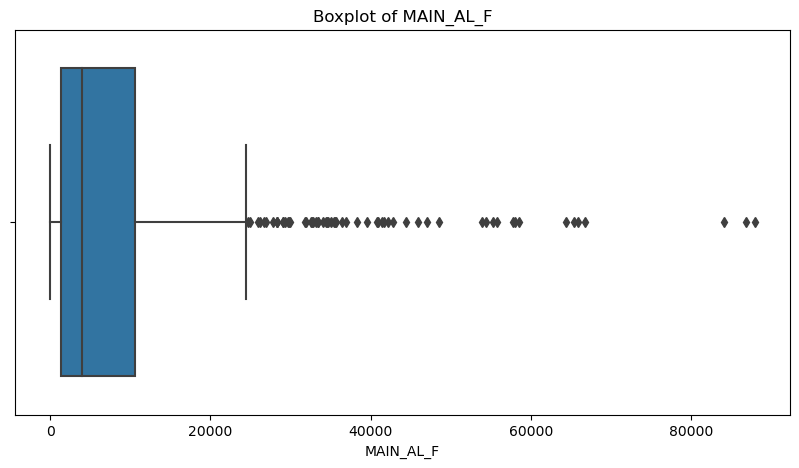

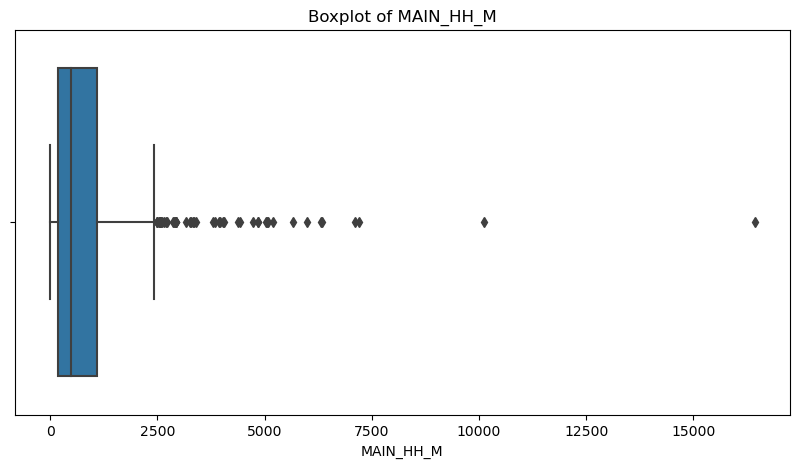

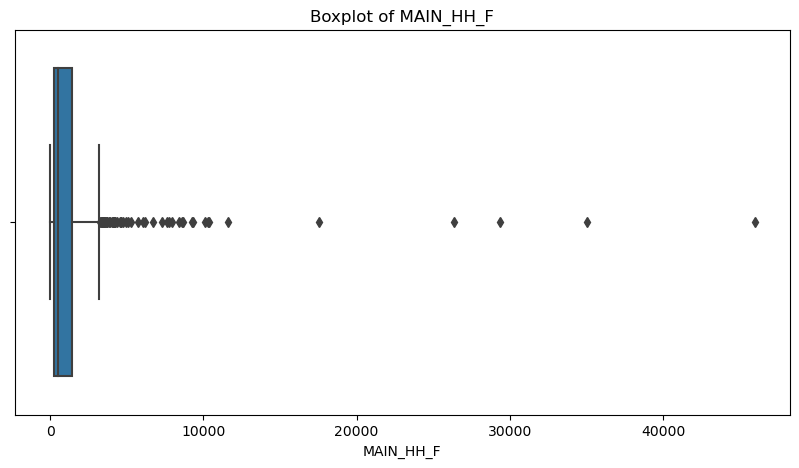

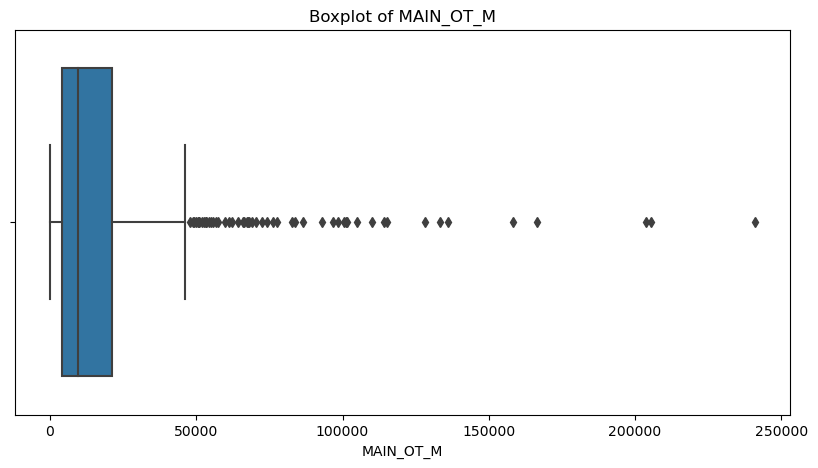

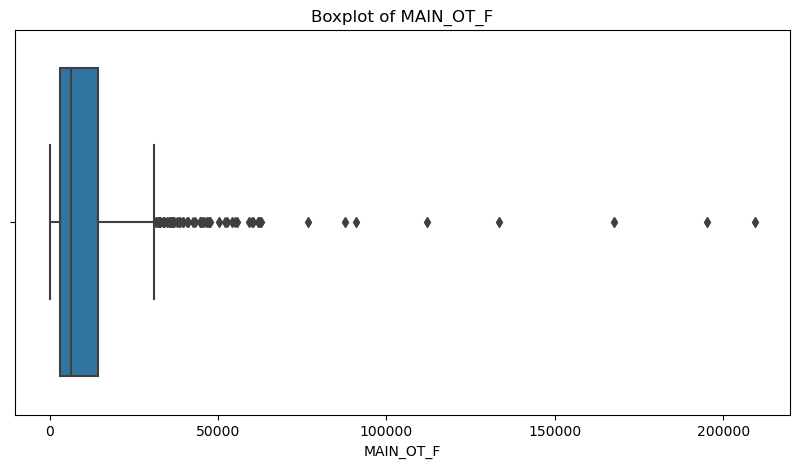

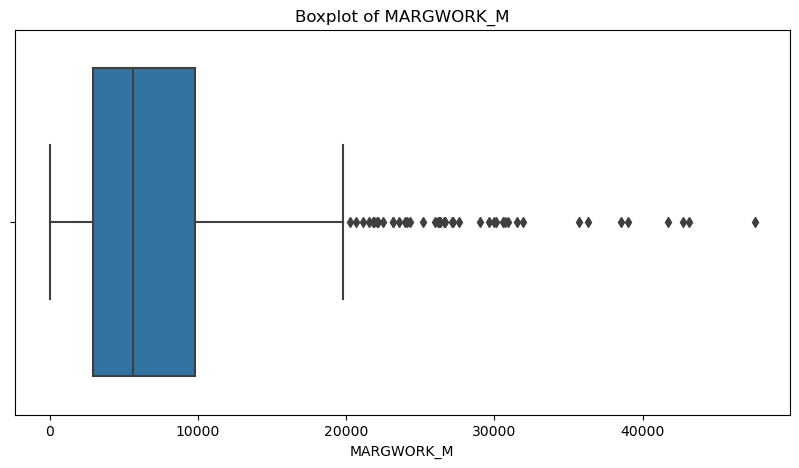

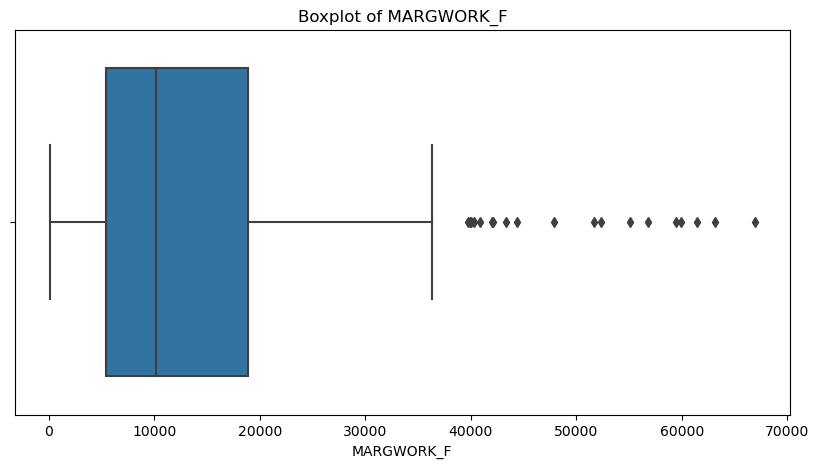

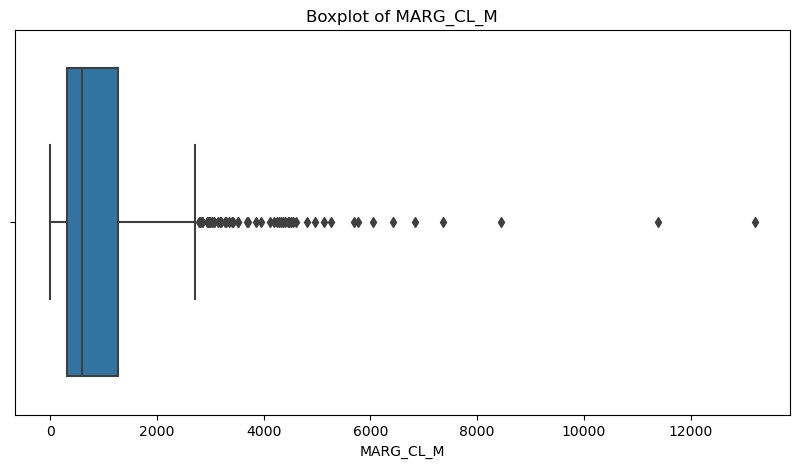

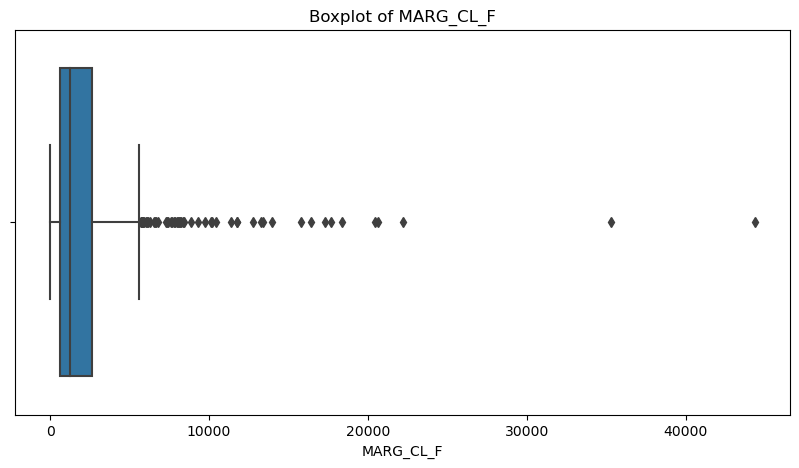

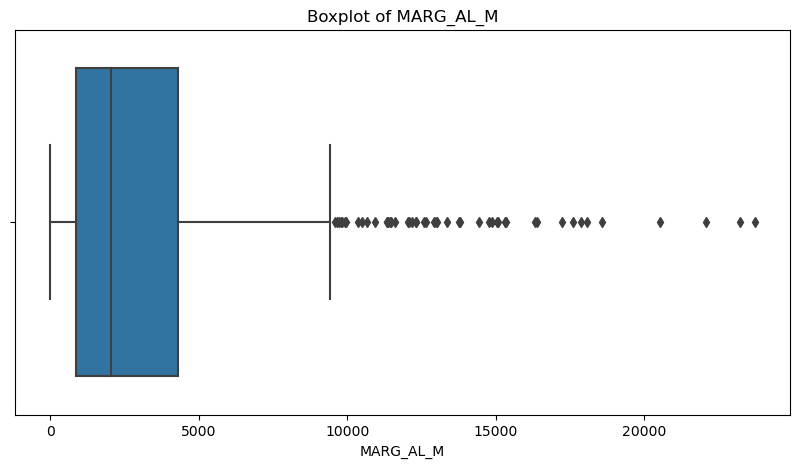

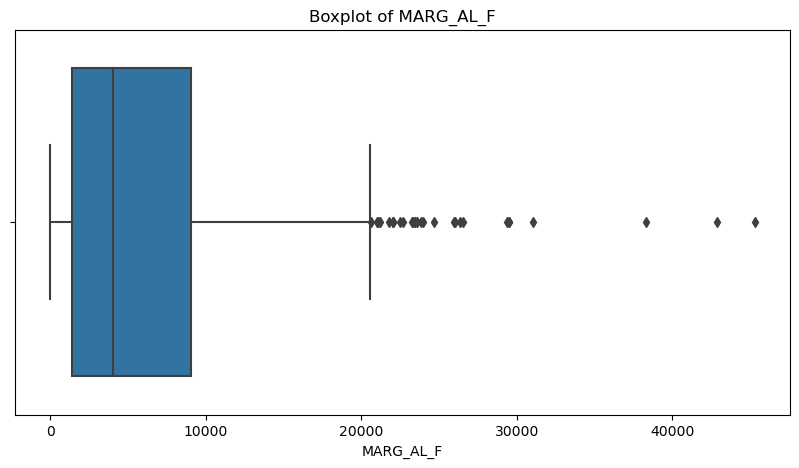

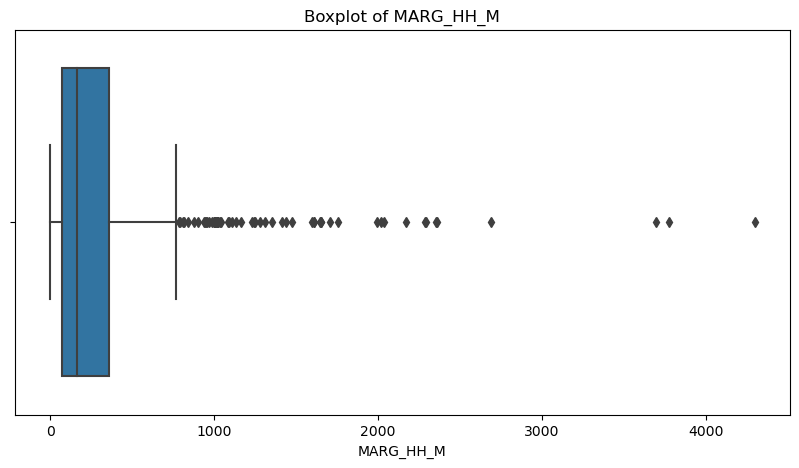

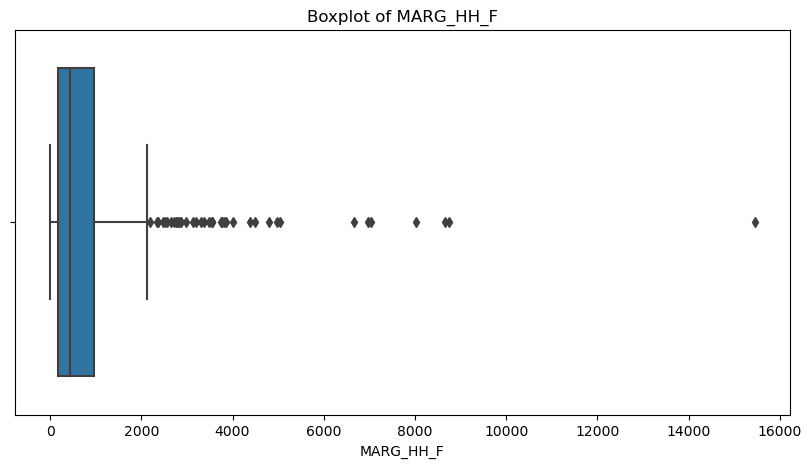

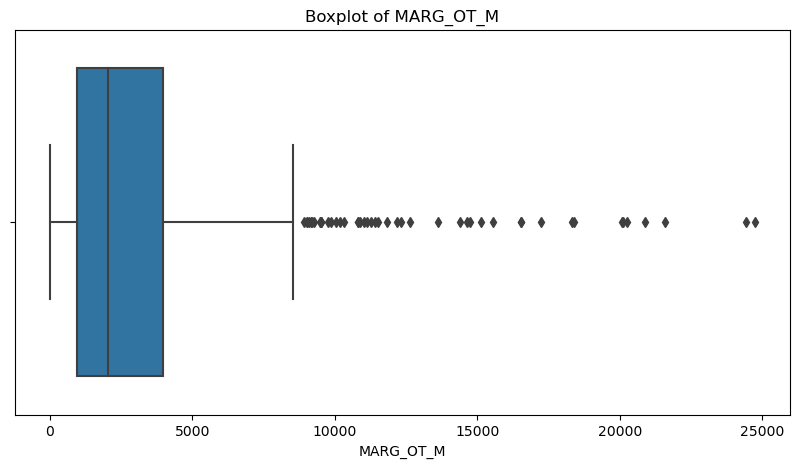

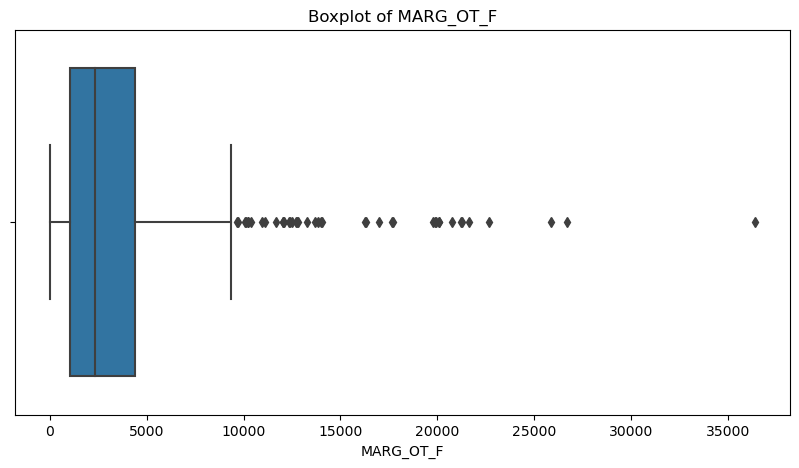

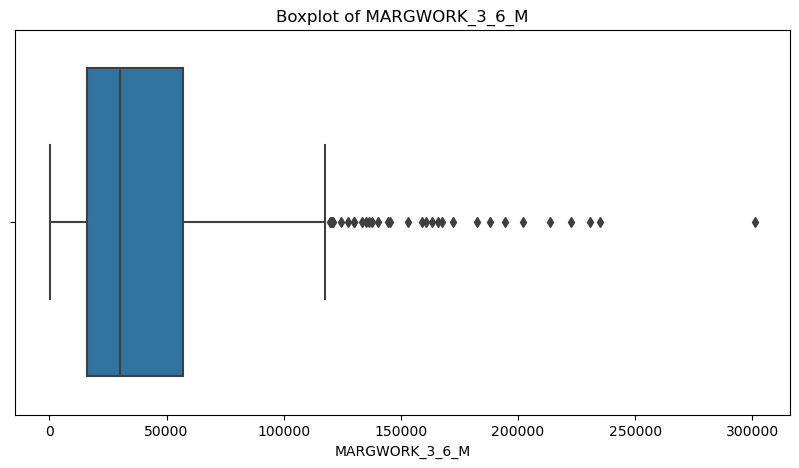

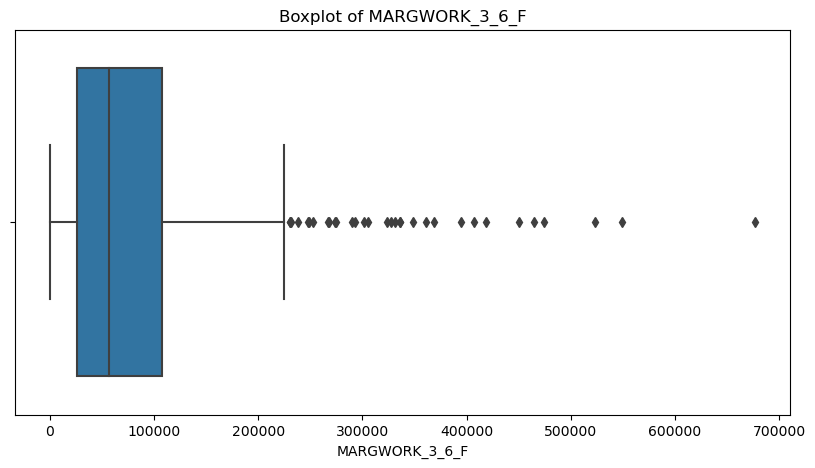

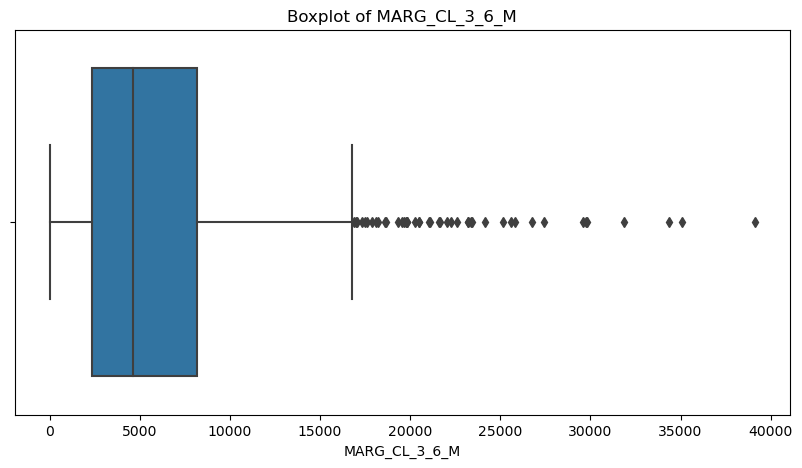

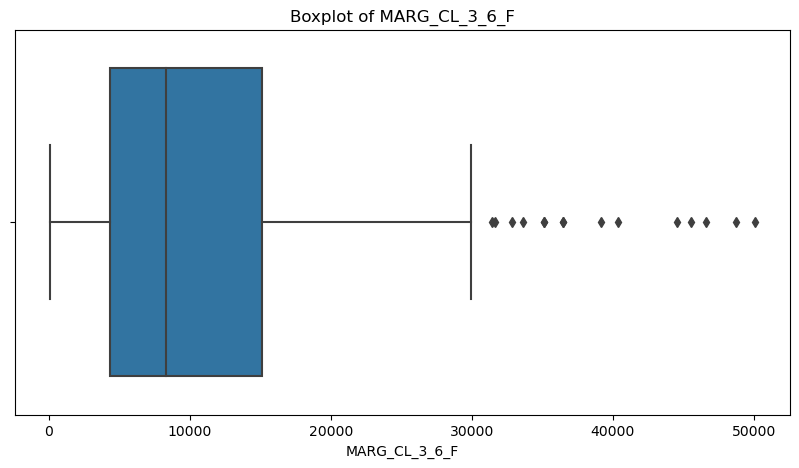

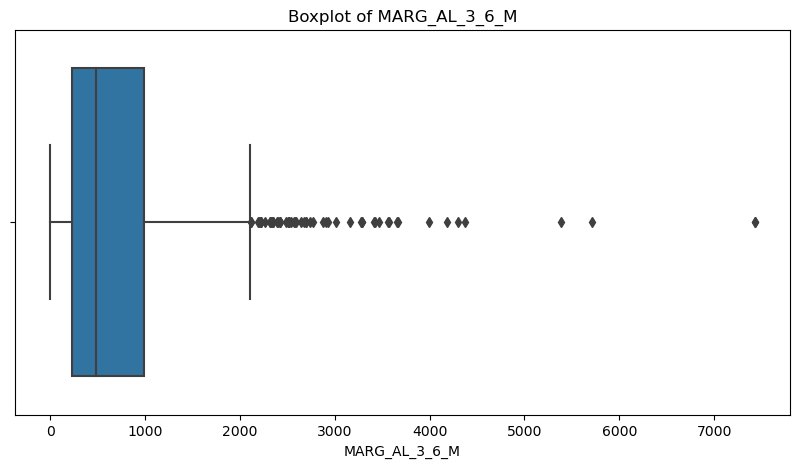

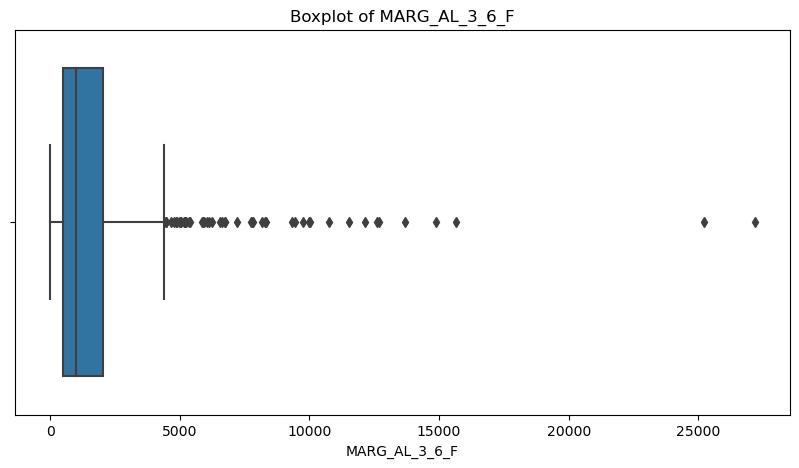

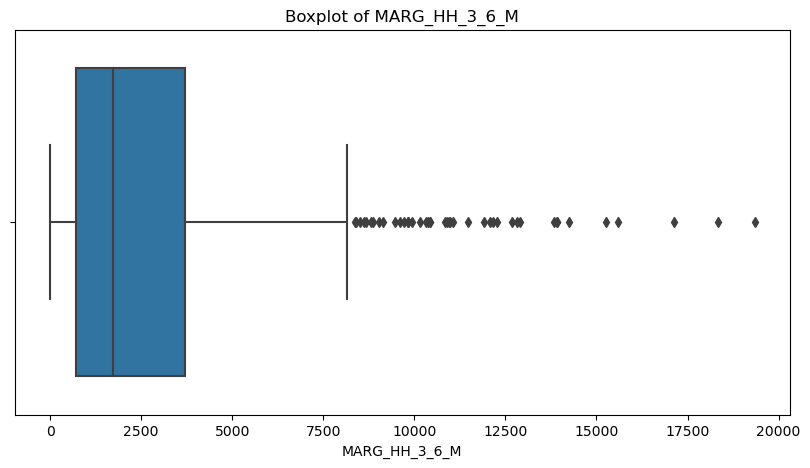

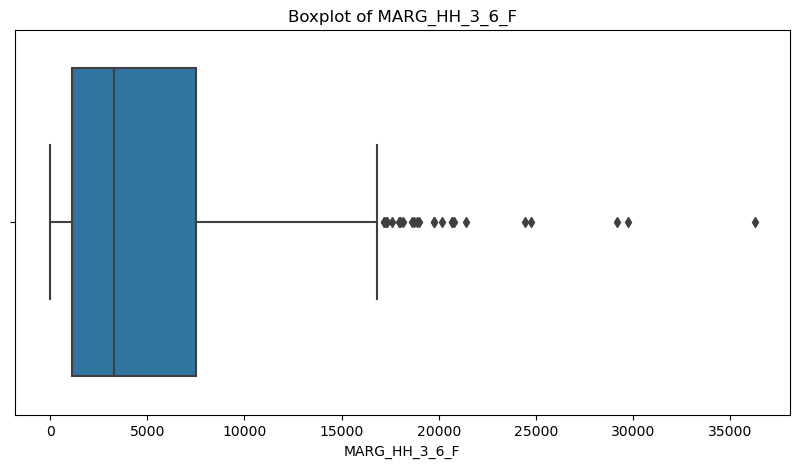

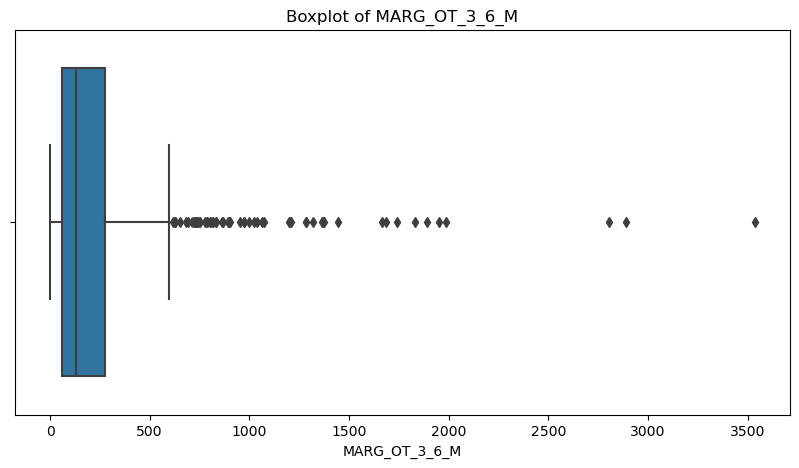

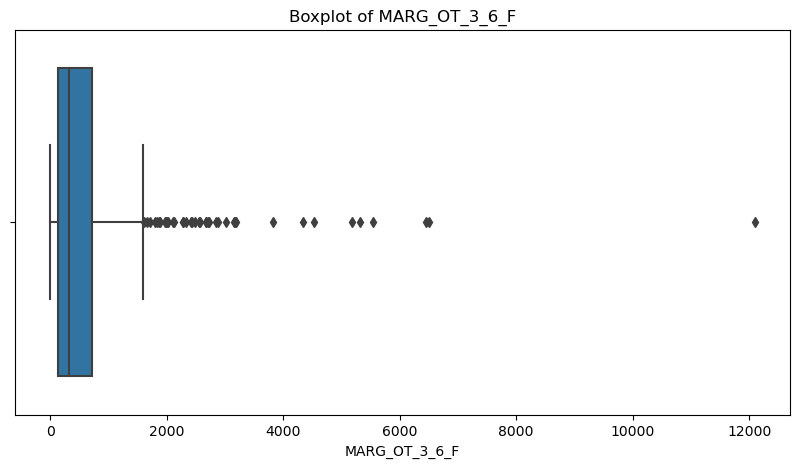

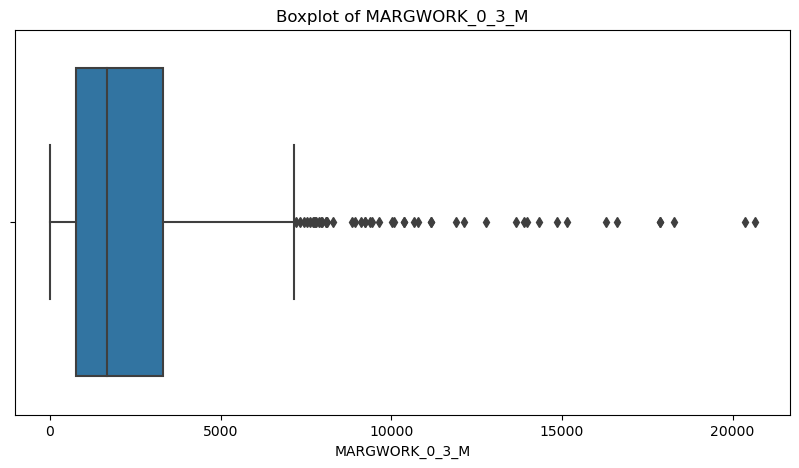

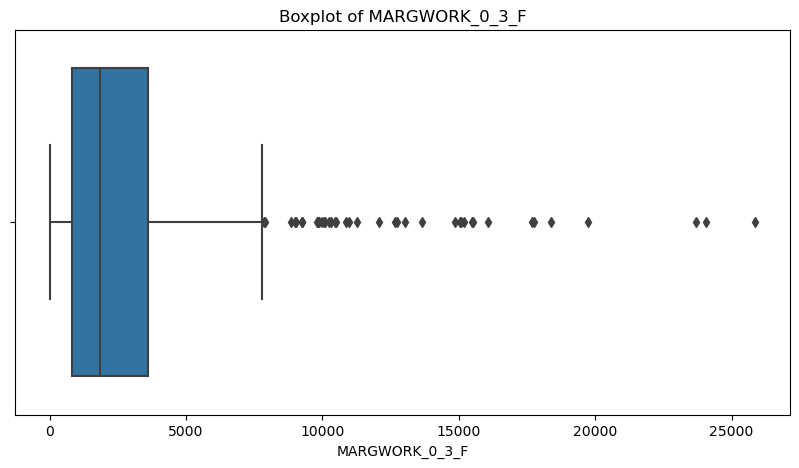

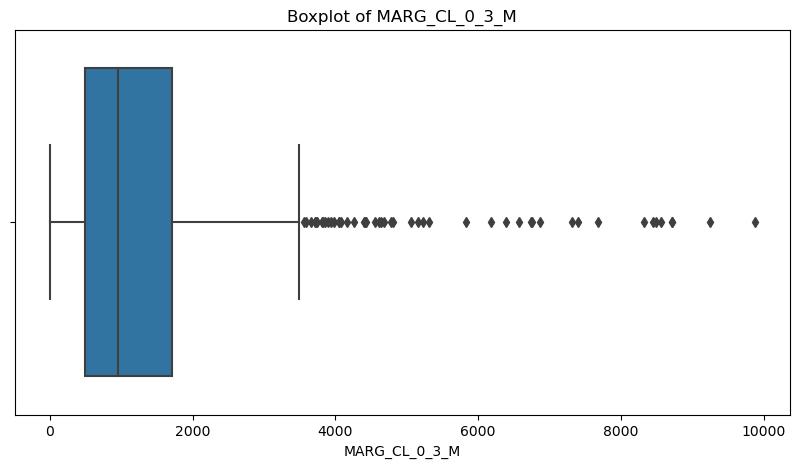

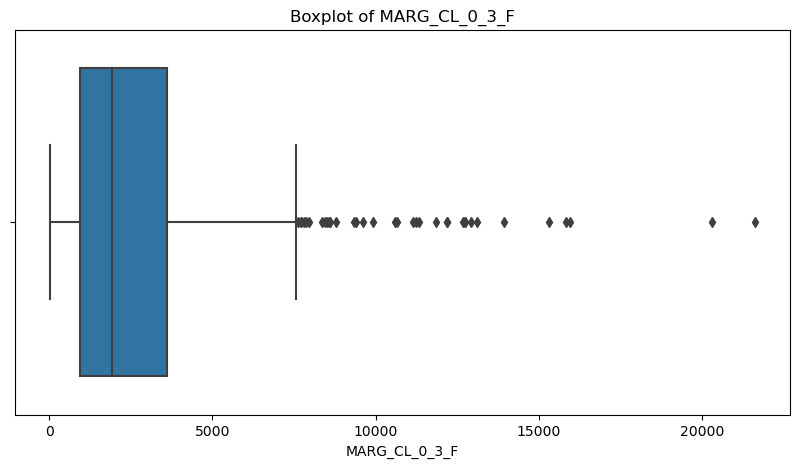

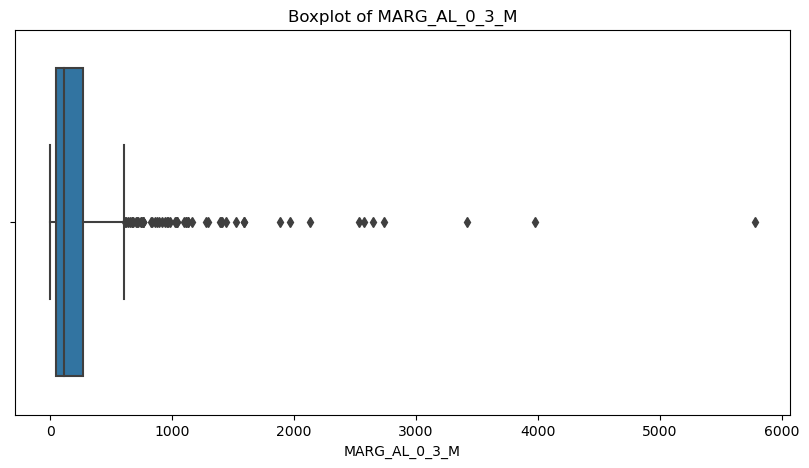

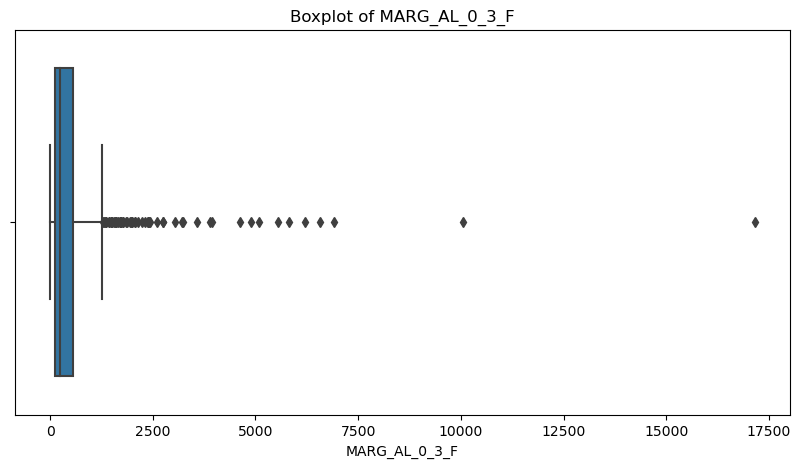

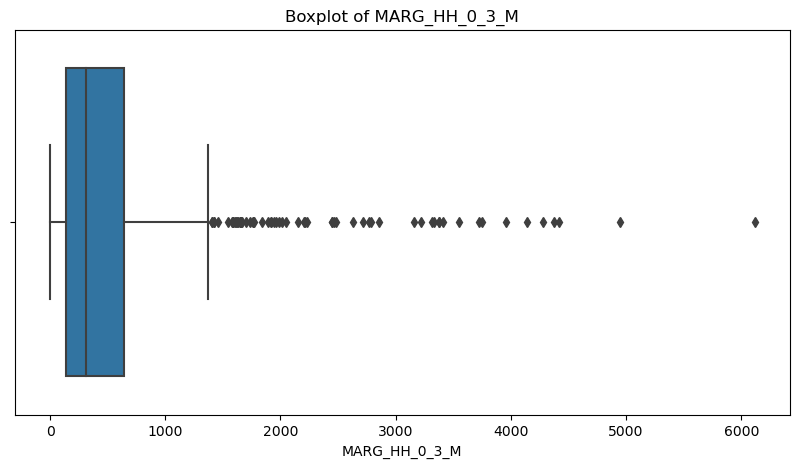

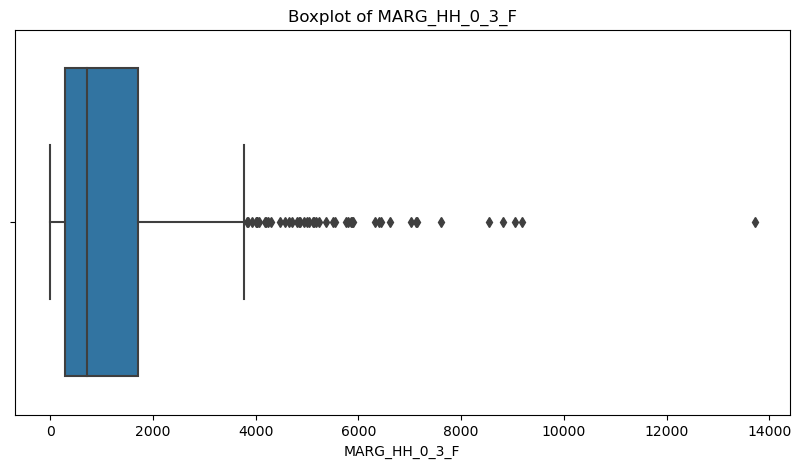

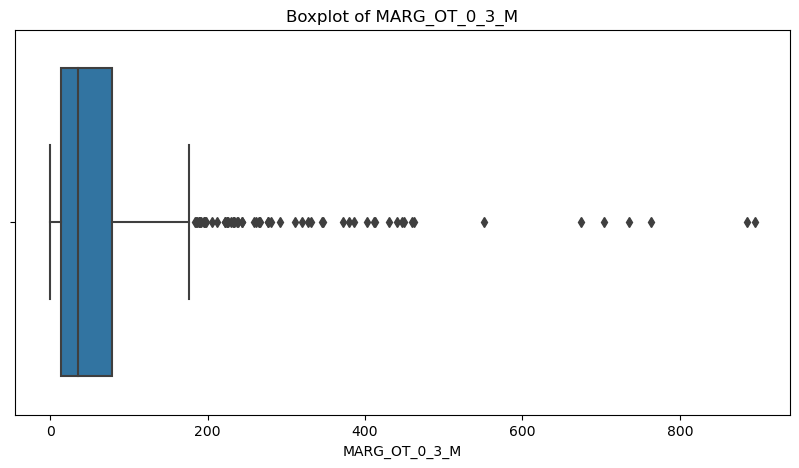

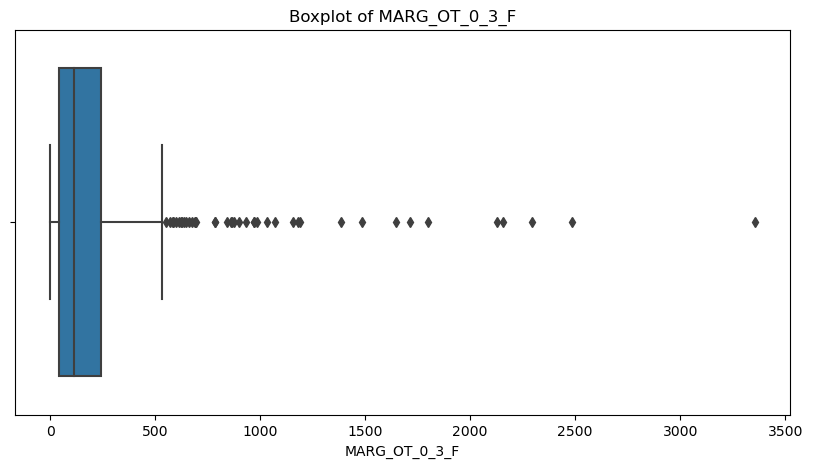

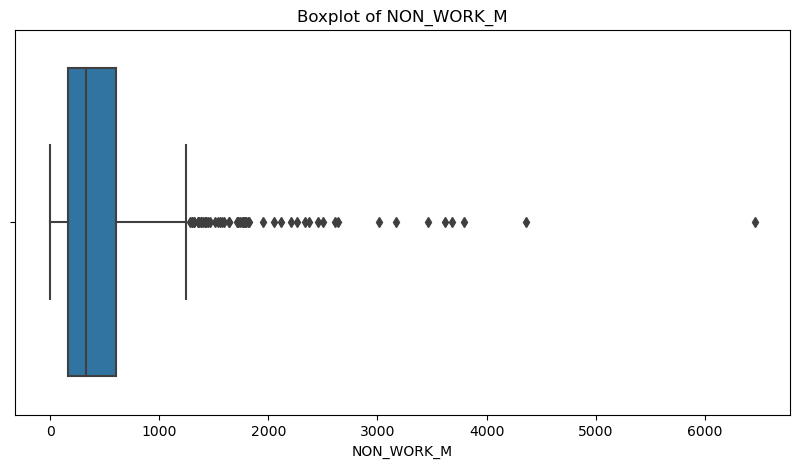

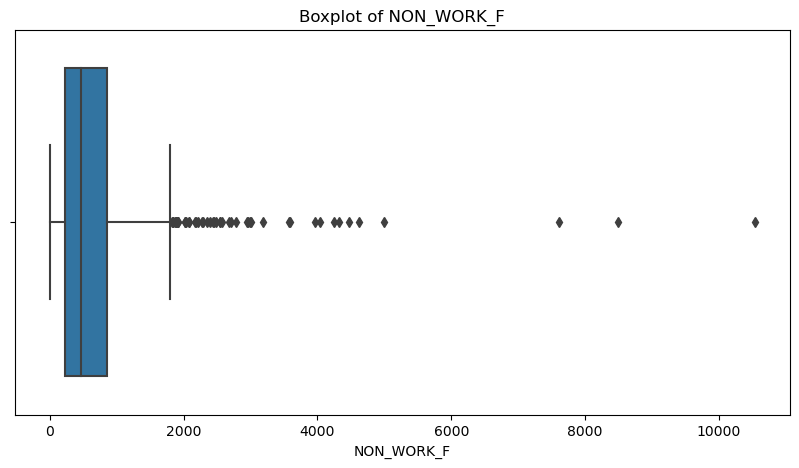

In [9]:
numerical_columns = [col for col in df.columns if df[col].dtype == 'int64']

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

as we can observe we have a lot of outliers in our numerical data set , we need to solve this problem  

we can see, every-numerical column has outliers, except state and dictrict code which is technically not a  numerical column 

In [10]:
def cap_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5* iqr
    up = q3 + 1.5* iqr
    df[column_name] = np.where(df[column_name] < lb, lb, df[column_name])
    df[column_name] = np.where(df[column_name] > up, up, df[column_name])
    return df

columns_to_process = [col for col in df.columns if df[col].dtype == 'int64' and col not in ['State Code', 'Dist.Code']]

for column in columns_to_process:
    df = cap_outliers(df, column)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    int64  
 1   Dist.Code       640 non-null    int64  
 2   State           640 non-null    object 
 3   Area Name       640 non-null    object 
 4   No_HH           640 non-null    float64
 5   TOT_M           640 non-null    float64
 6   TOT_F           640 non-null    float64
 7   M_06            640 non-null    float64
 8   F_06            640 non-null    float64
 9   M_SC            640 non-null    float64
 10  F_SC            640 non-null    float64
 11  M_ST            640 non-null    float64
 12  F_ST            640 non-null    float64
 13  M_LIT           640 non-null    float64
 14  F_LIT           640 non-null    float64
 15  M_ILL           640 non-null    float64
 16  F_ILL           640 non-null    float64
 17  TOT_WORK_M      640 non-null    flo

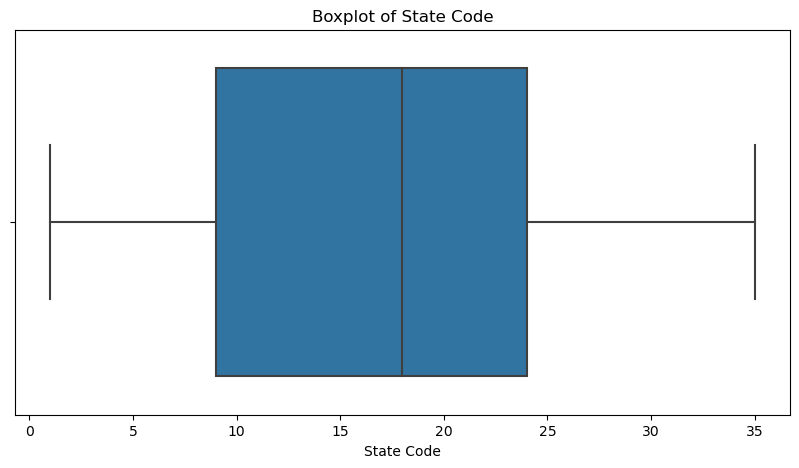

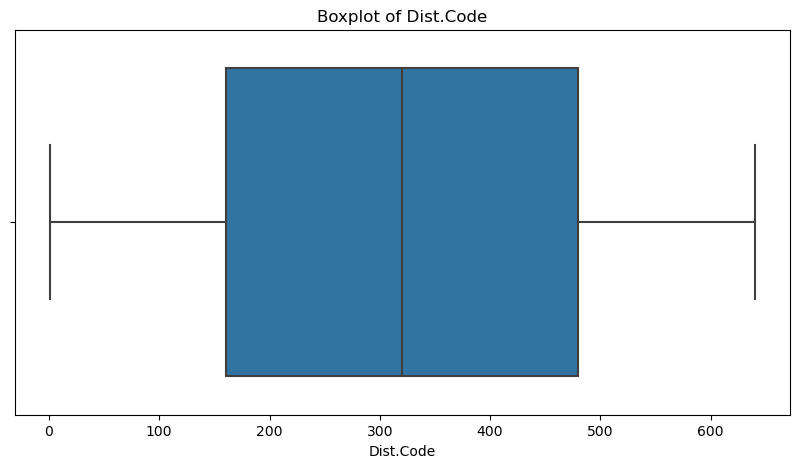

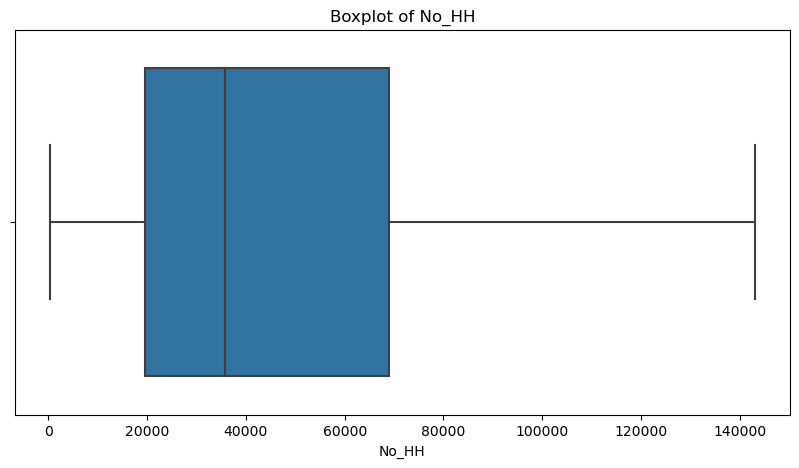

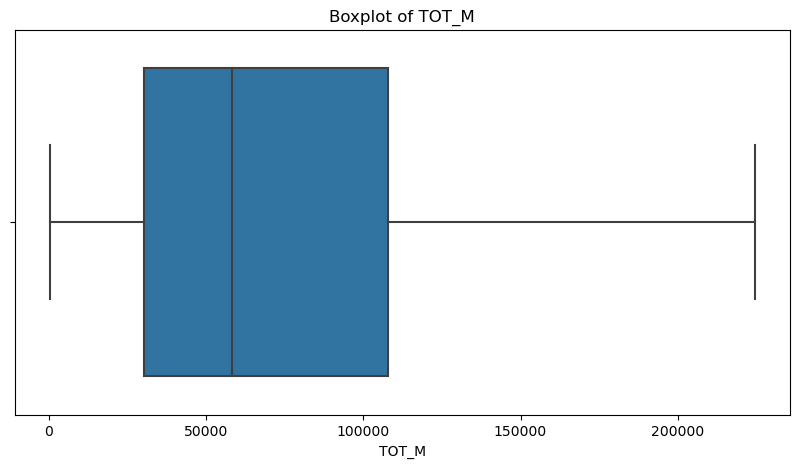

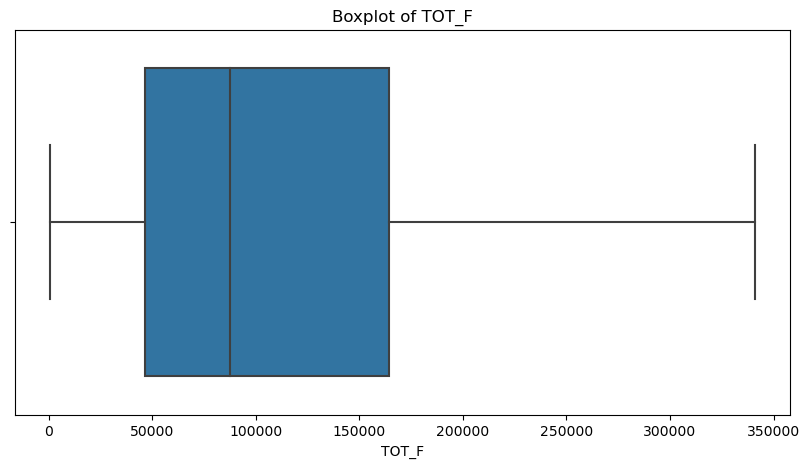

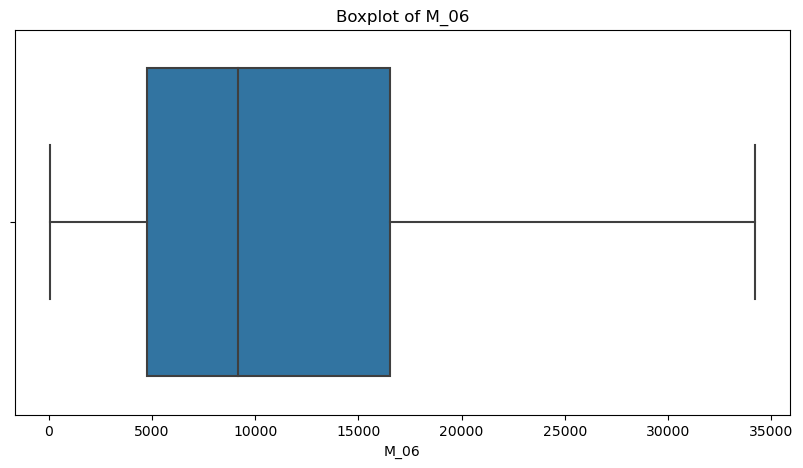

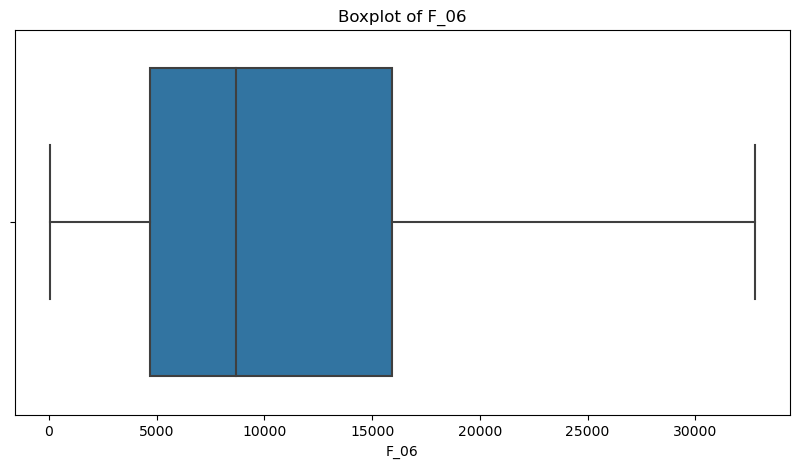

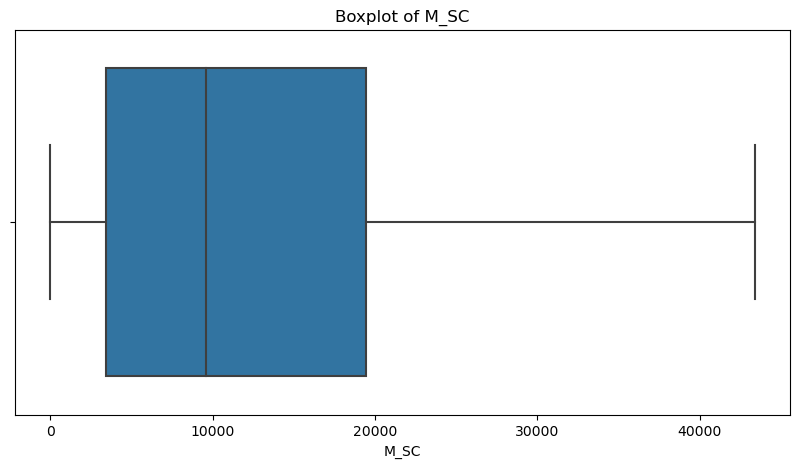

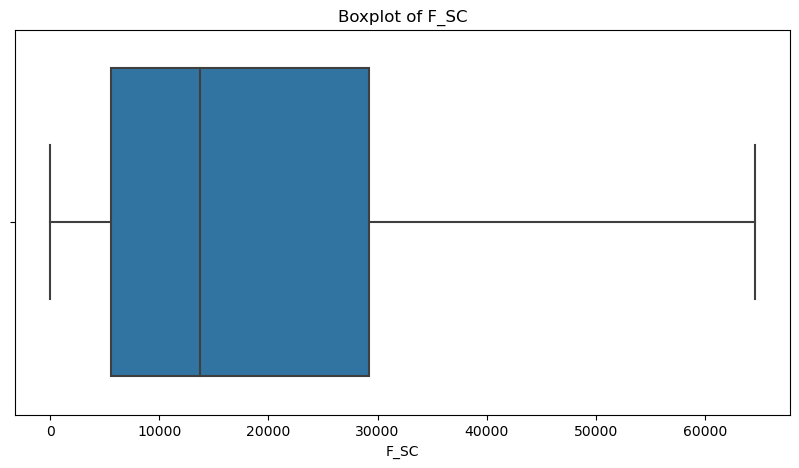

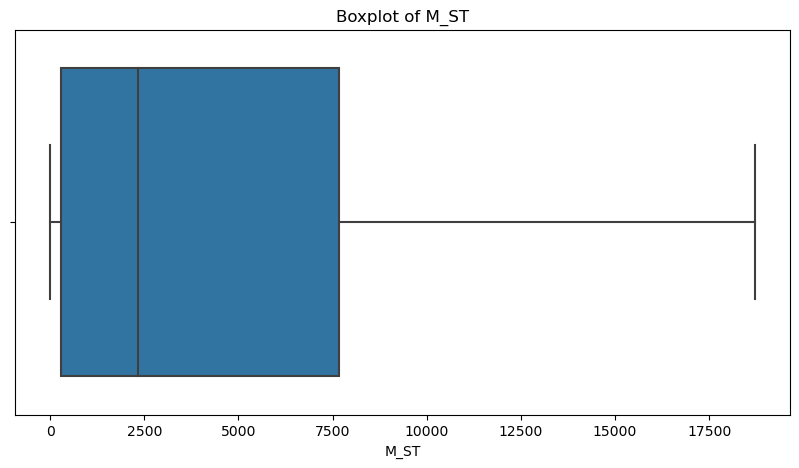

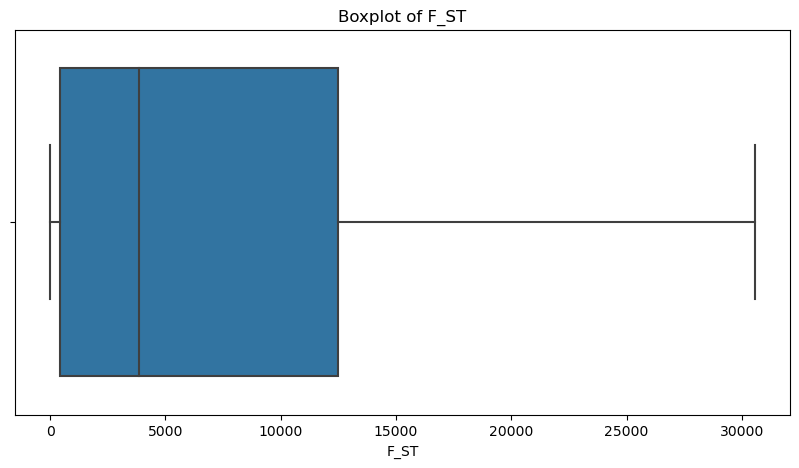

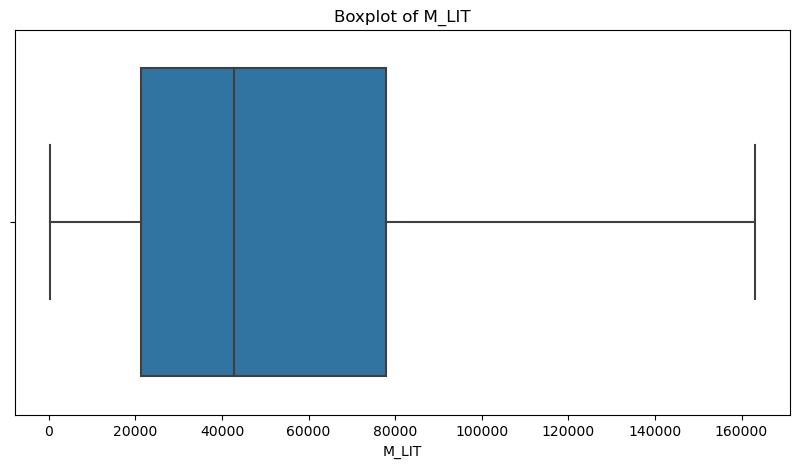

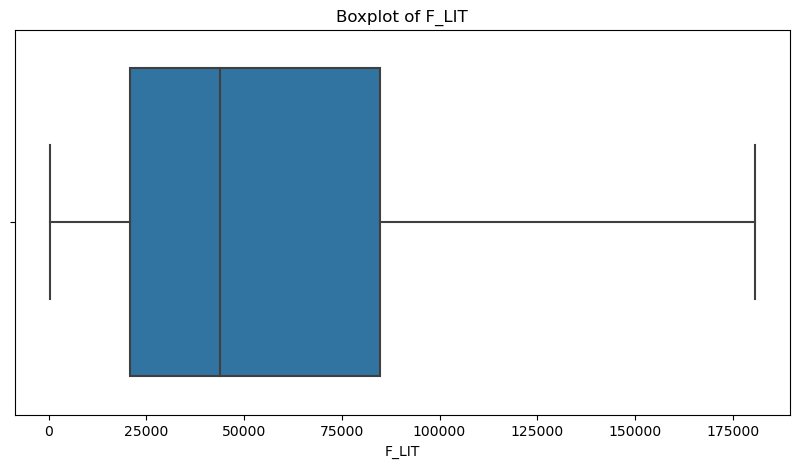

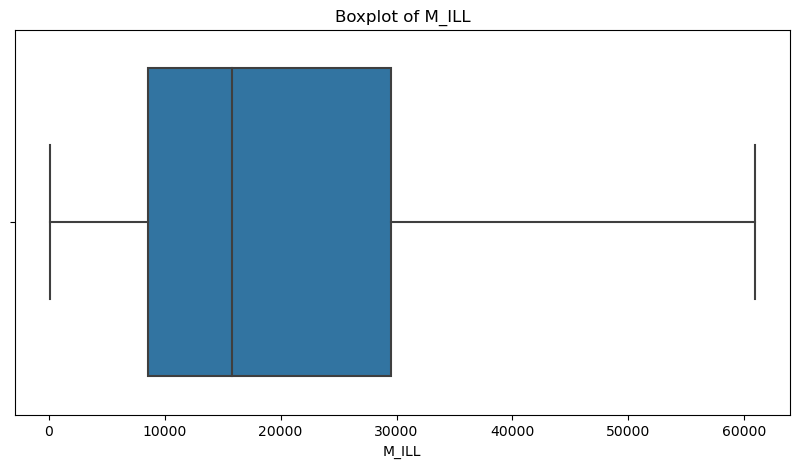

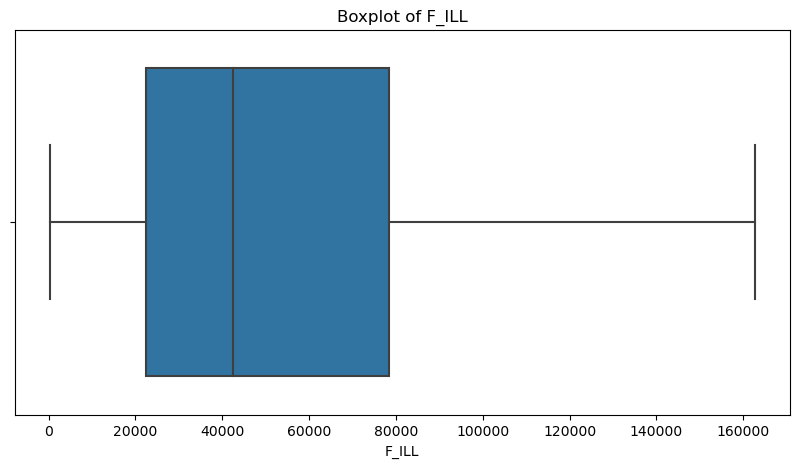

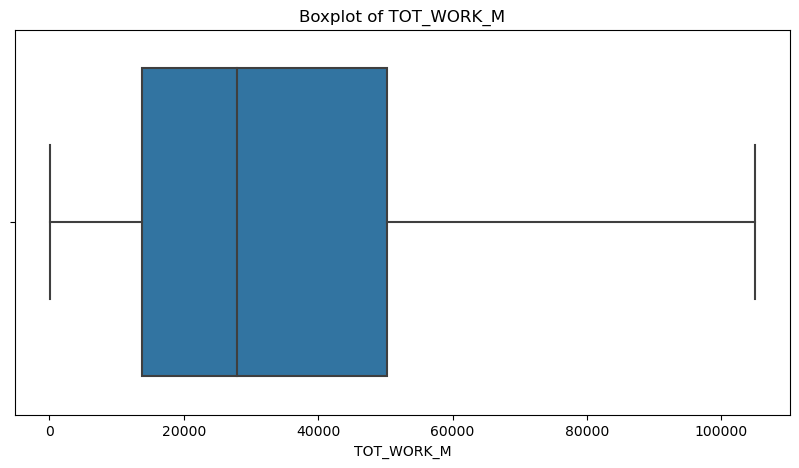

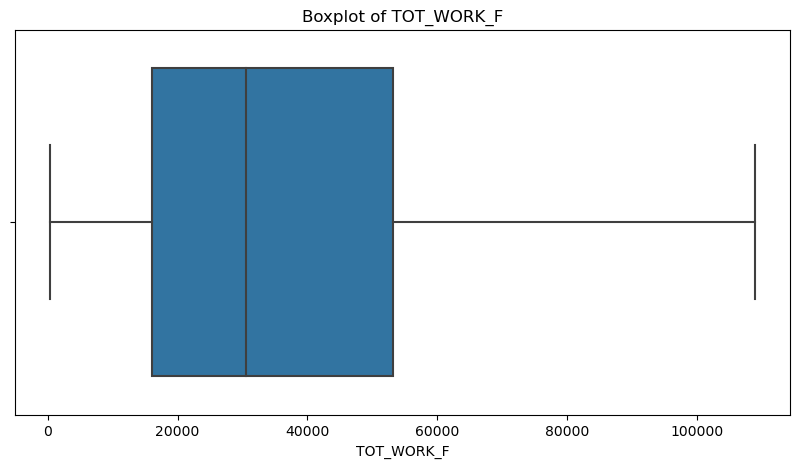

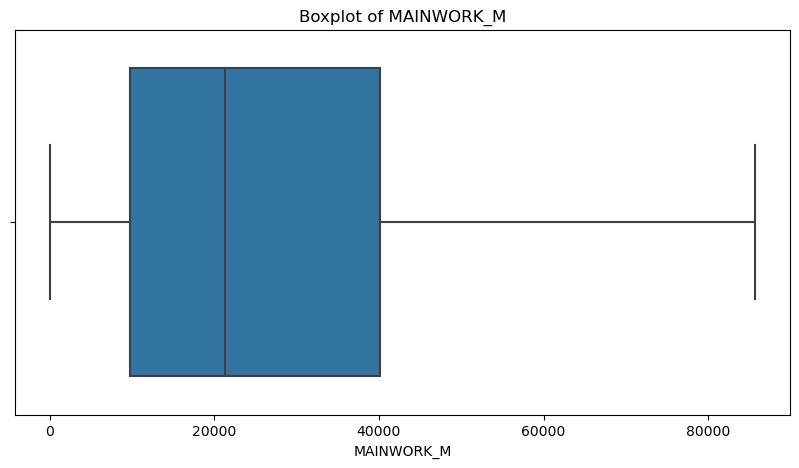

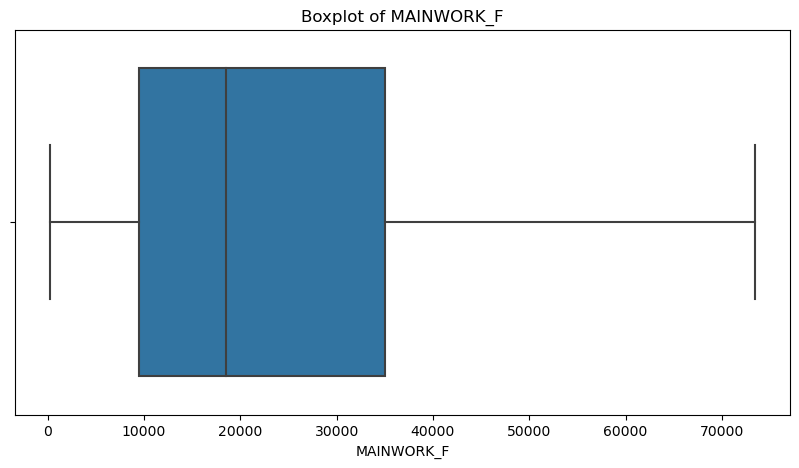

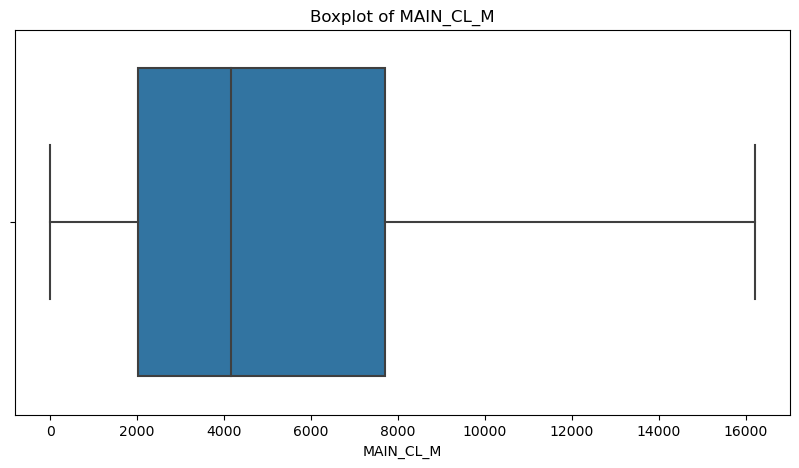

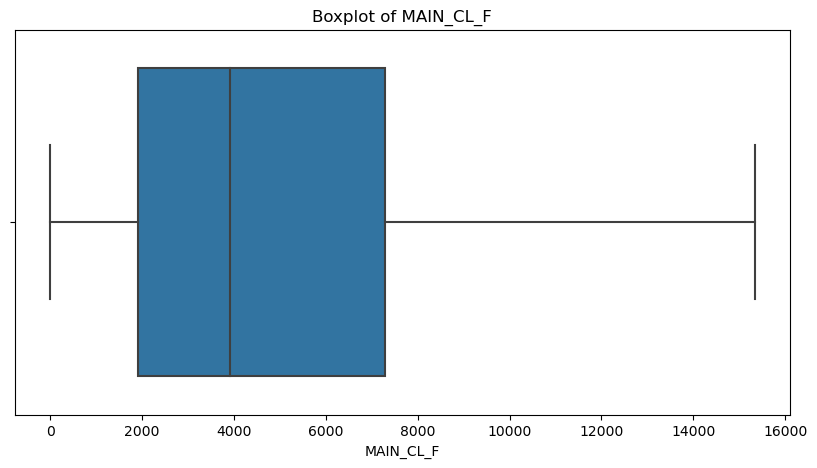

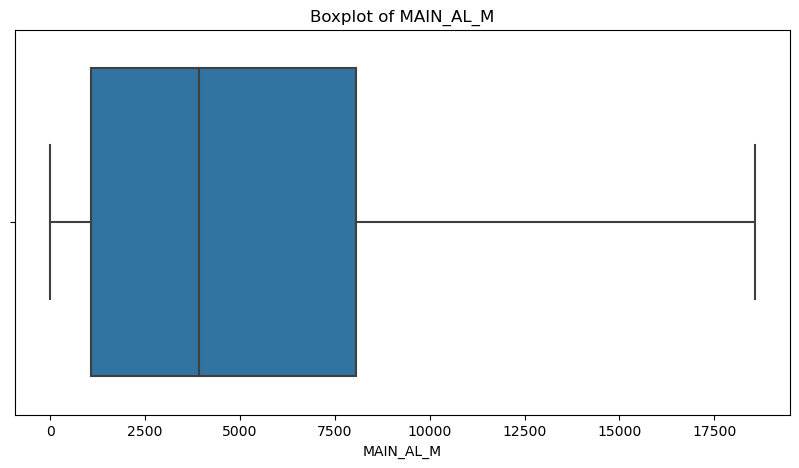

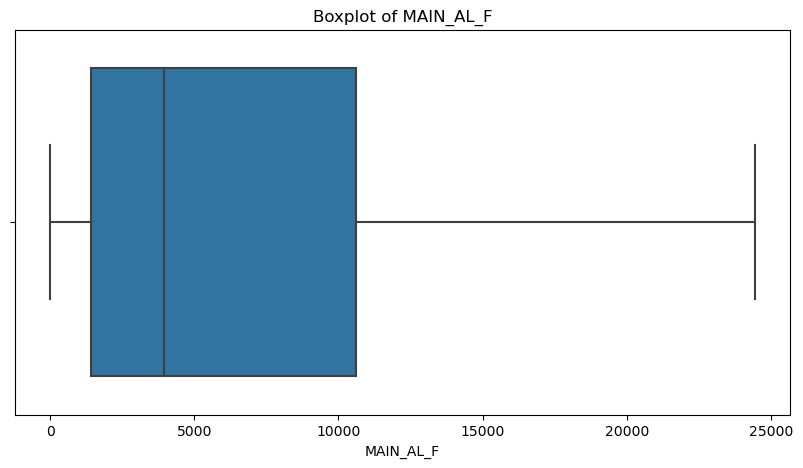

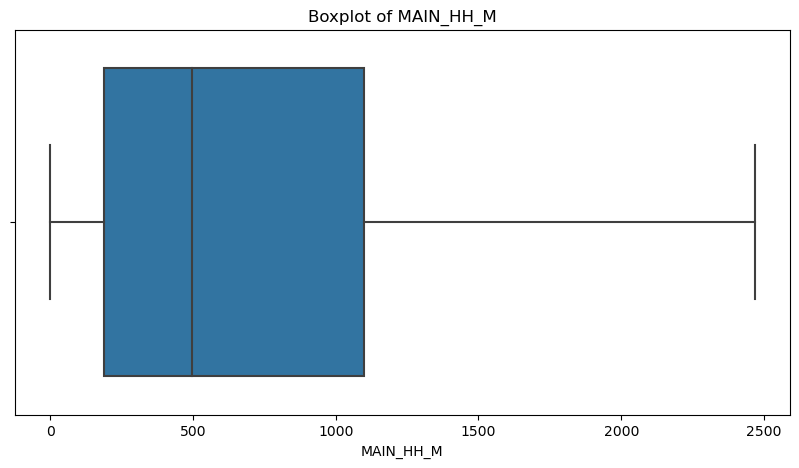

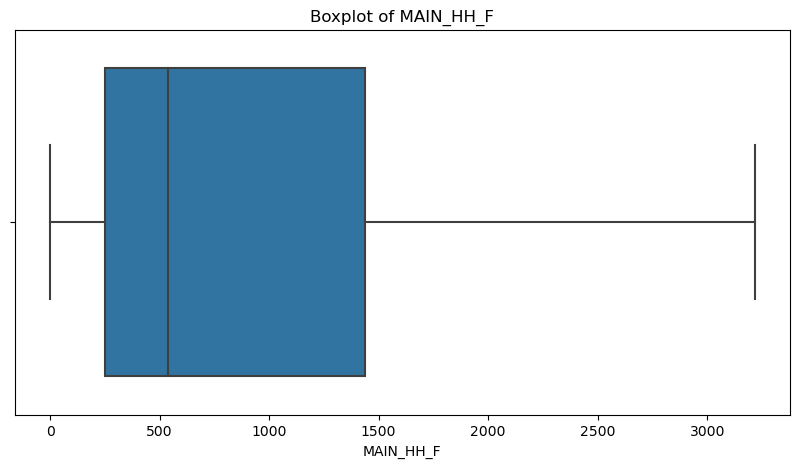

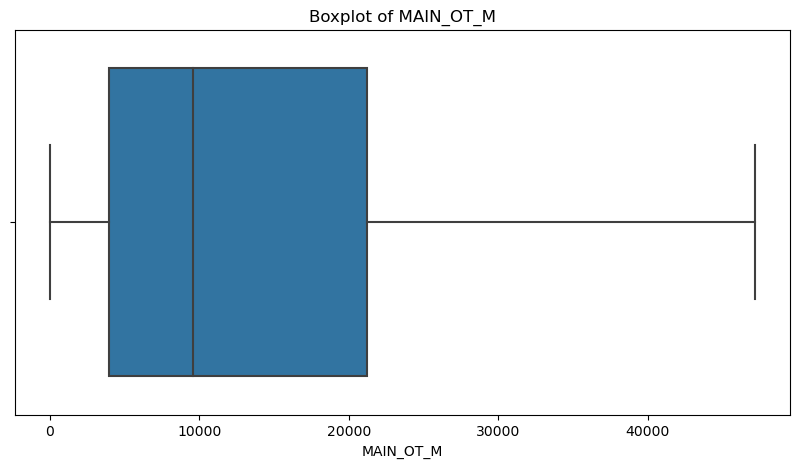

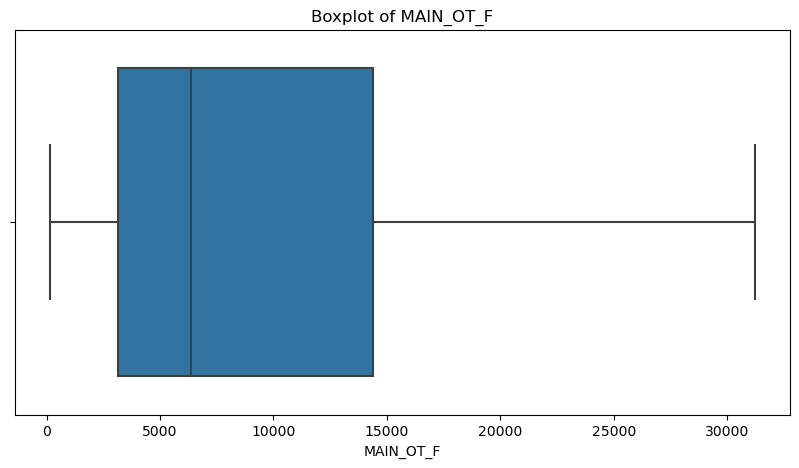

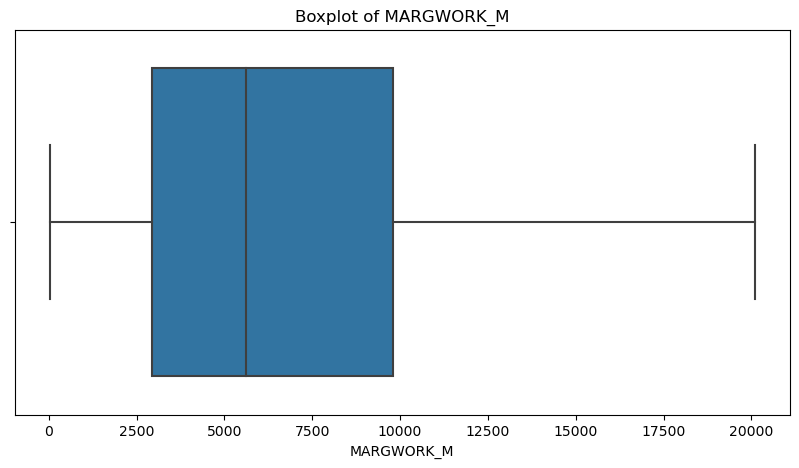

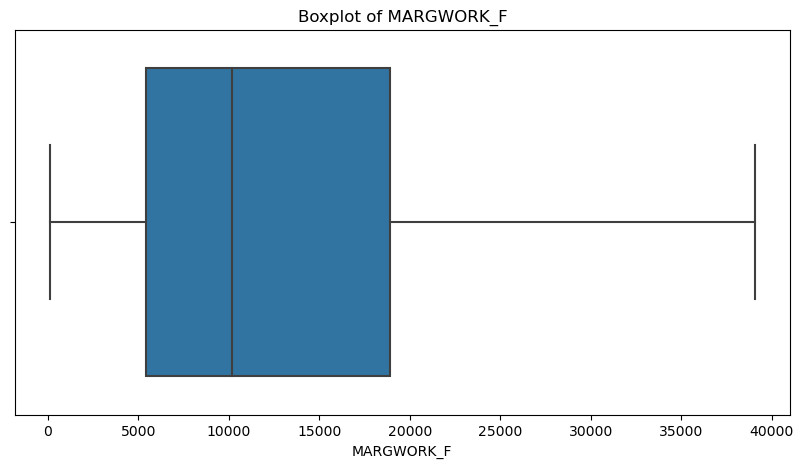

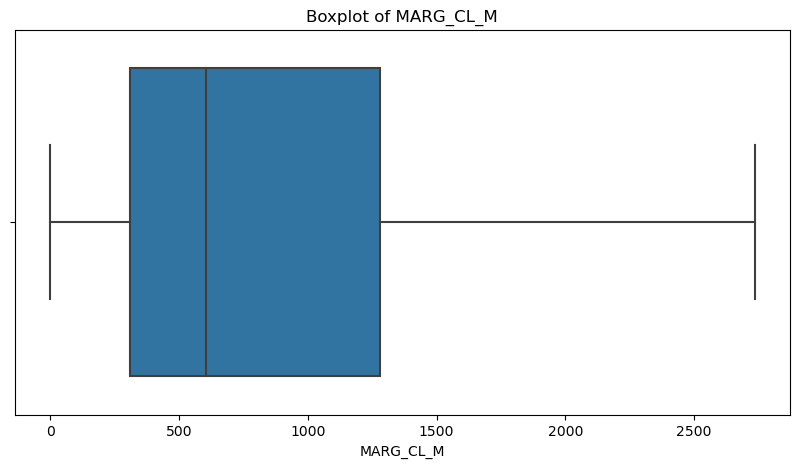

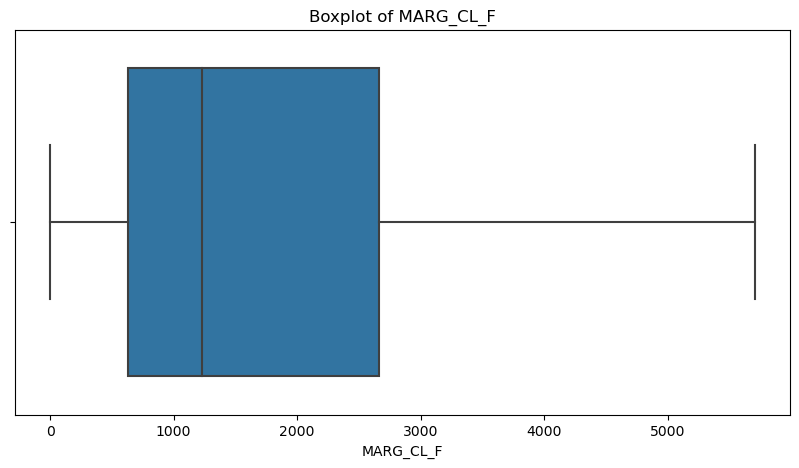

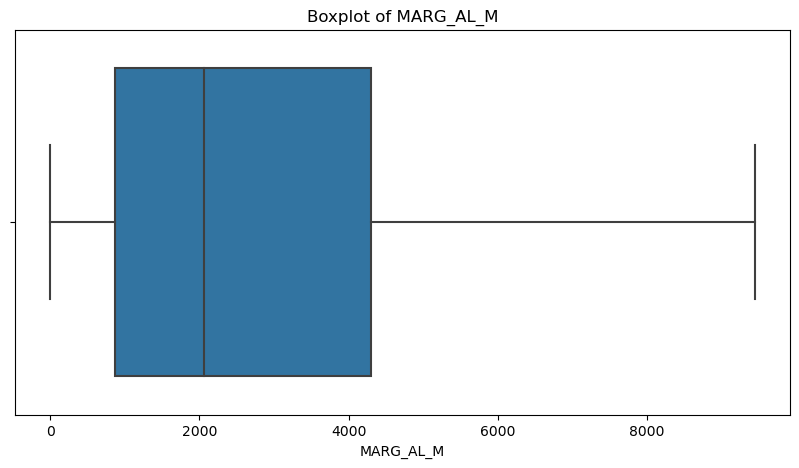

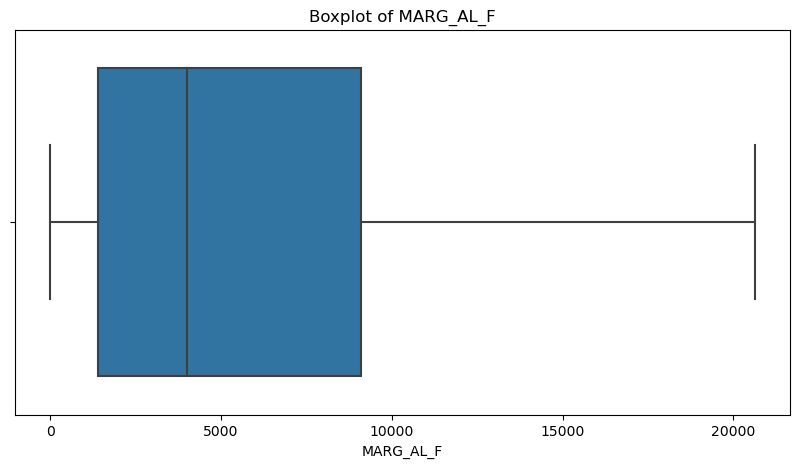

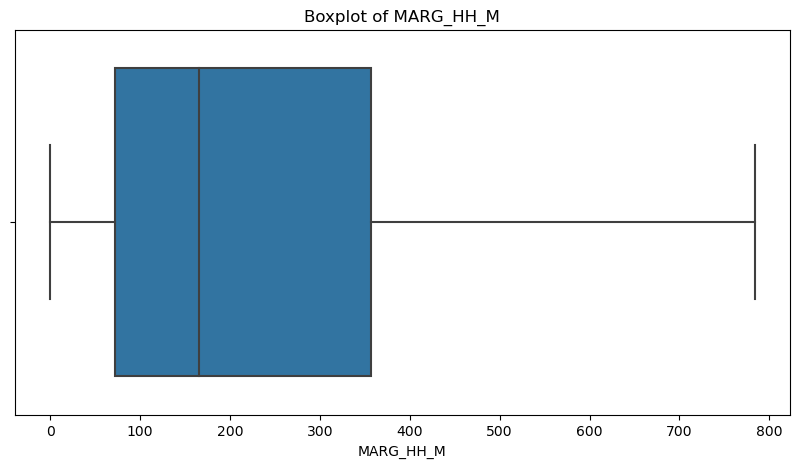

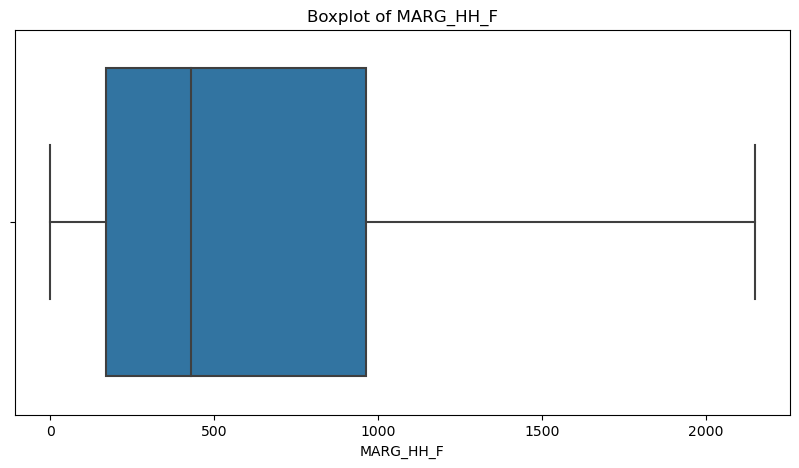

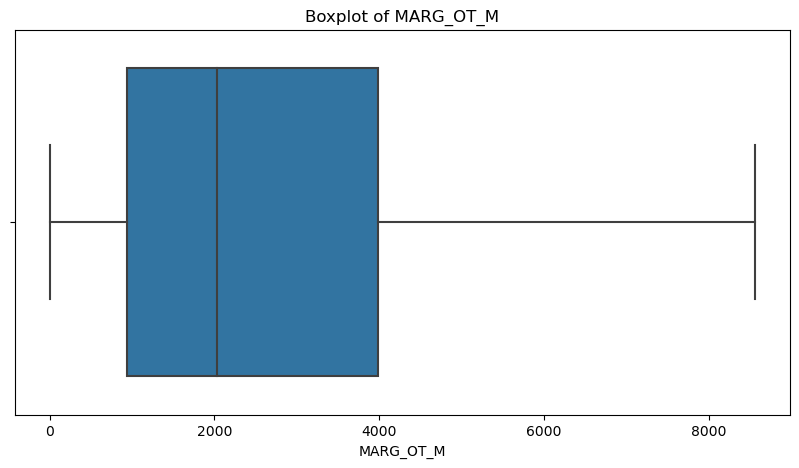

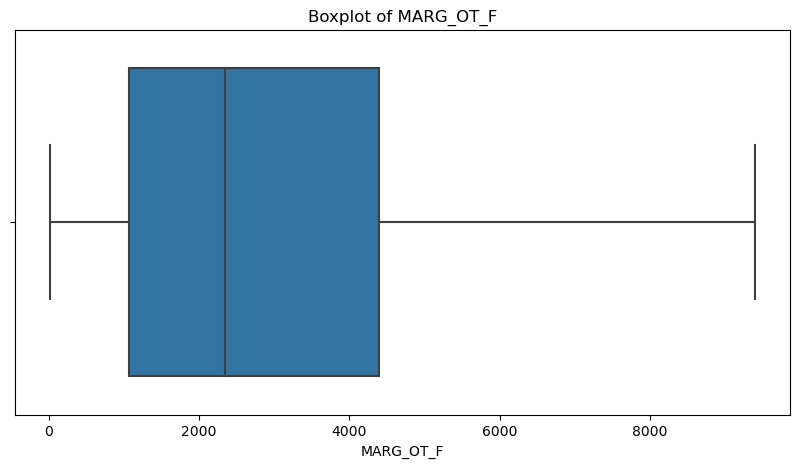

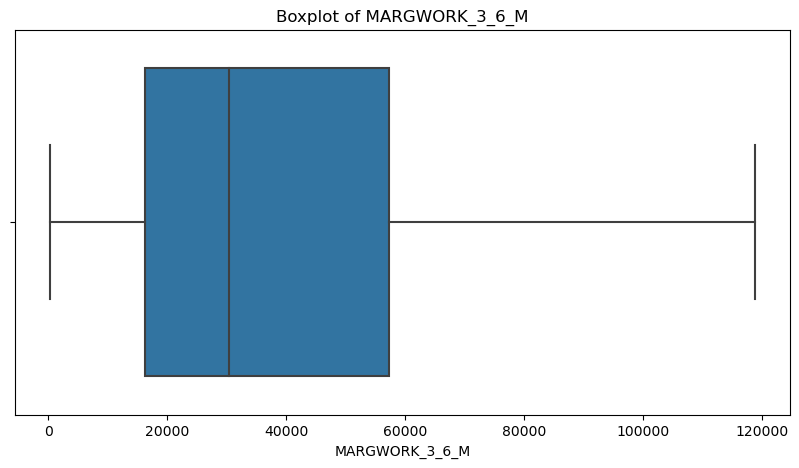

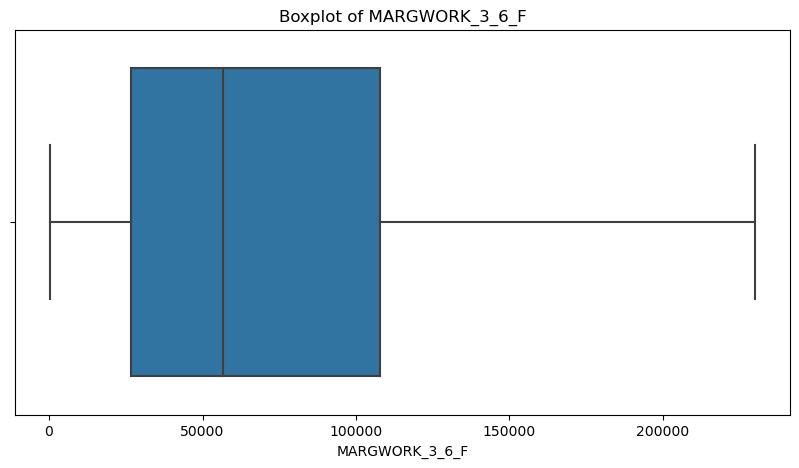

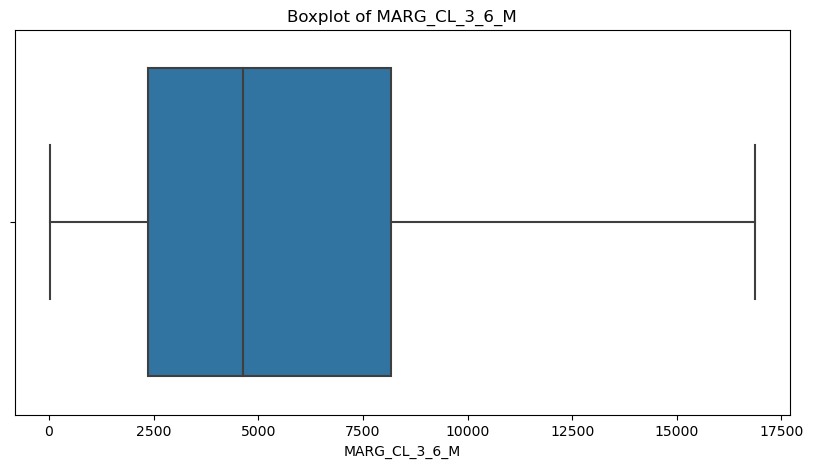

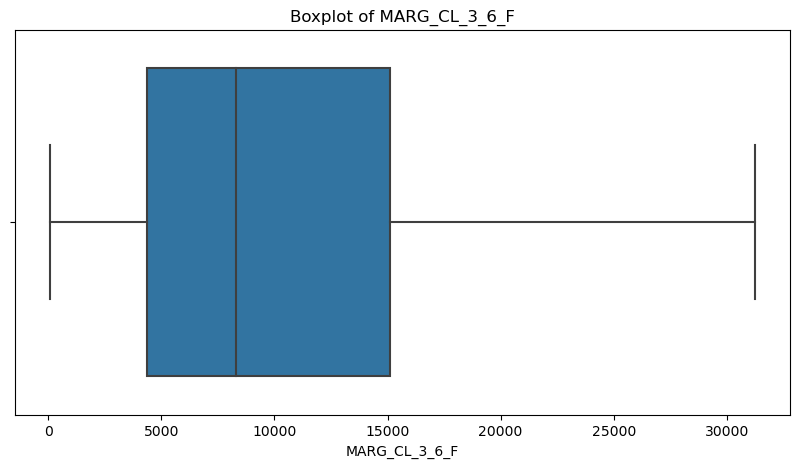

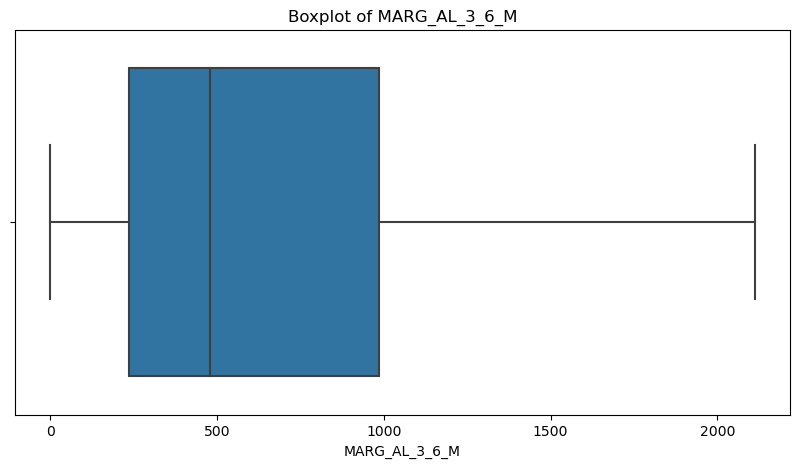

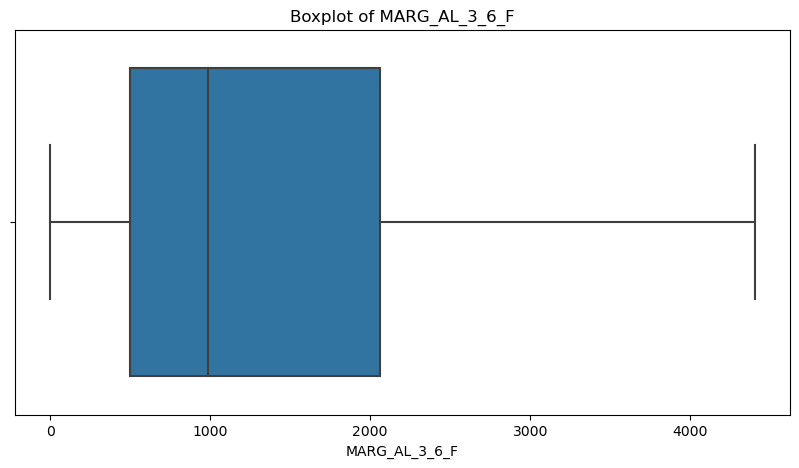

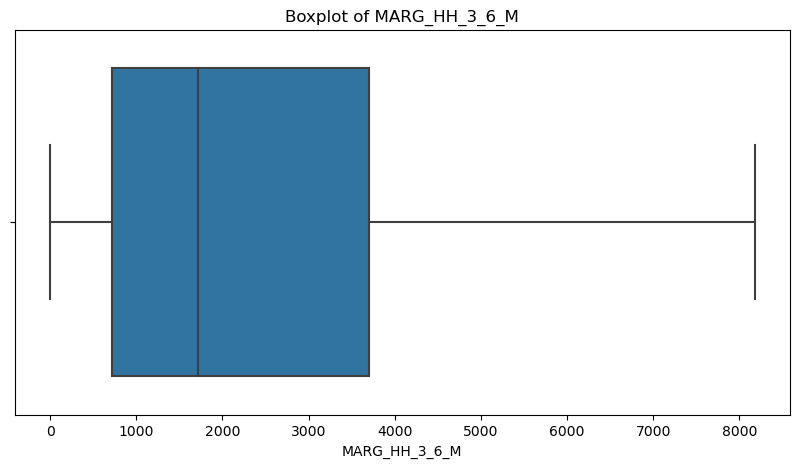

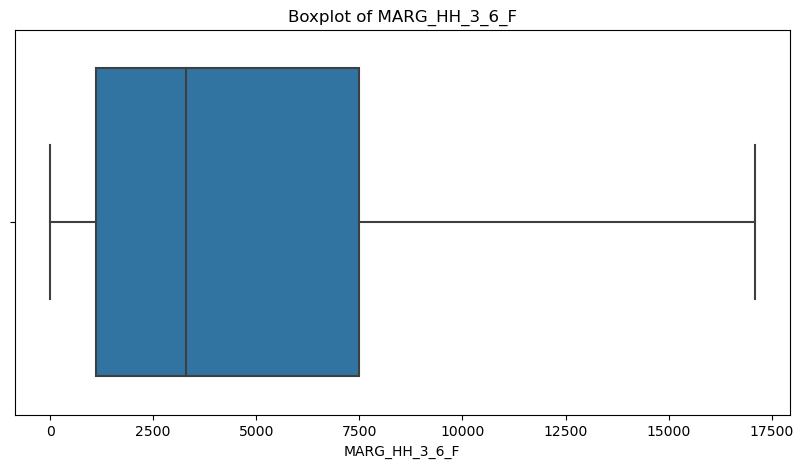

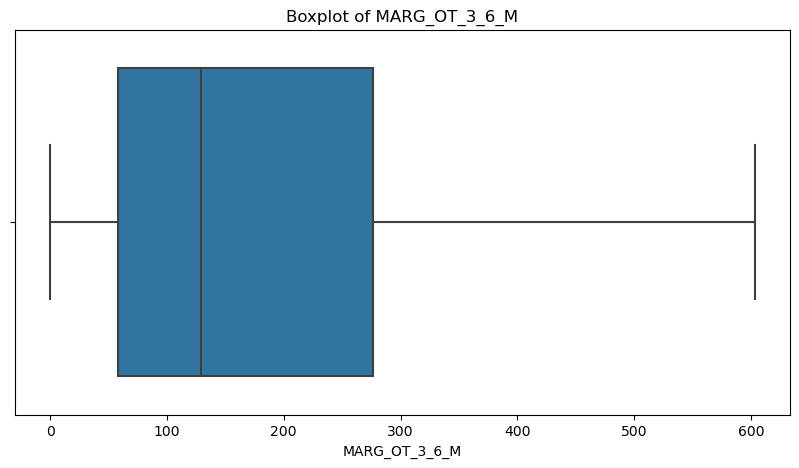

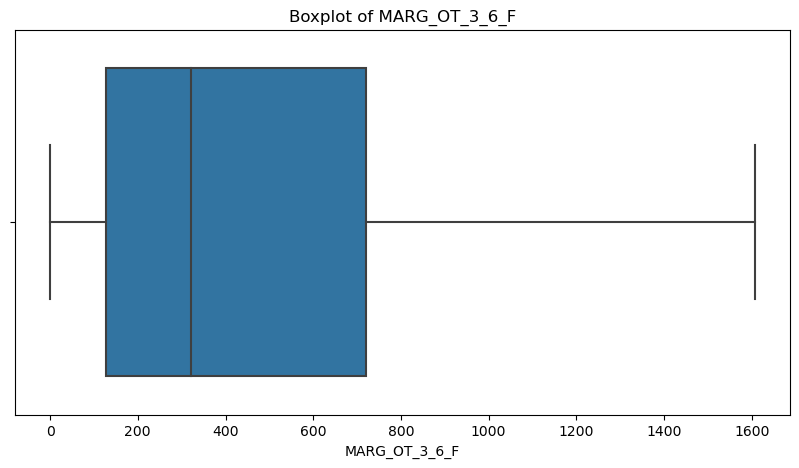

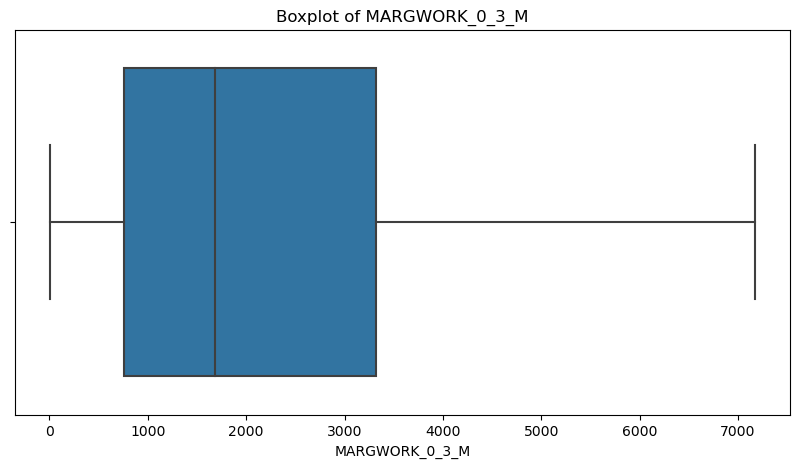

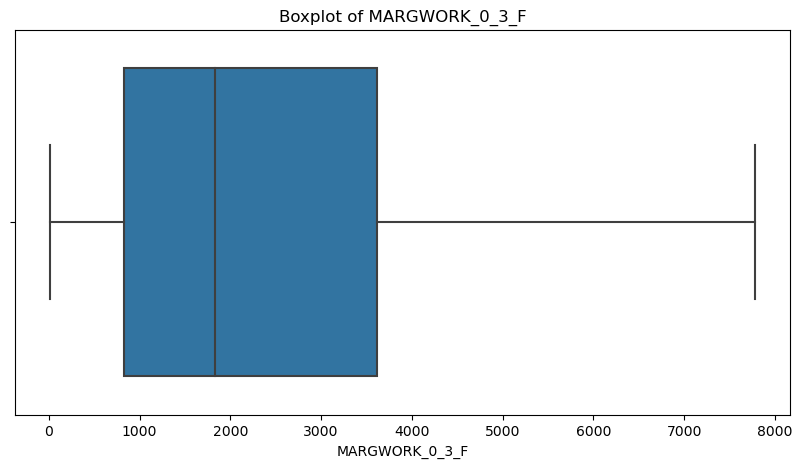

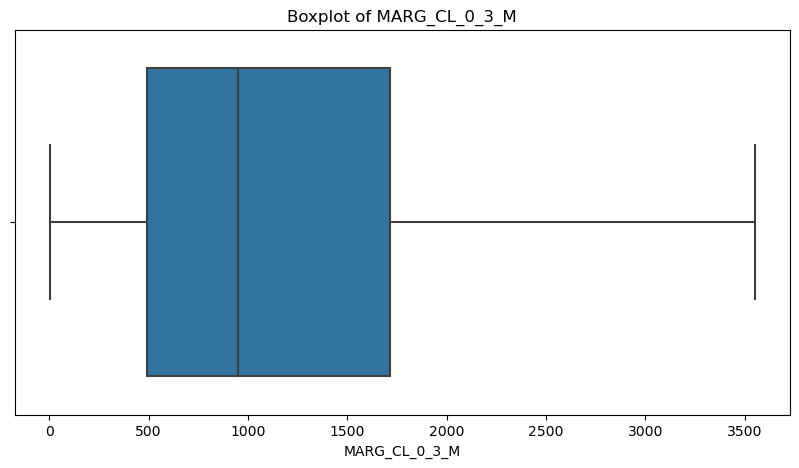

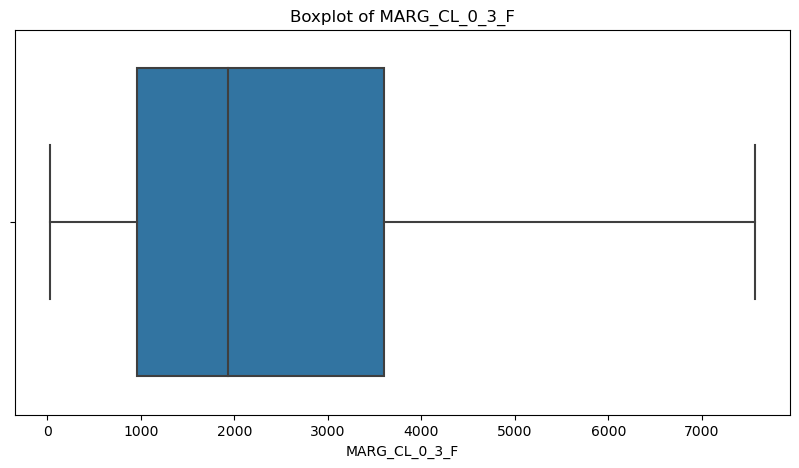

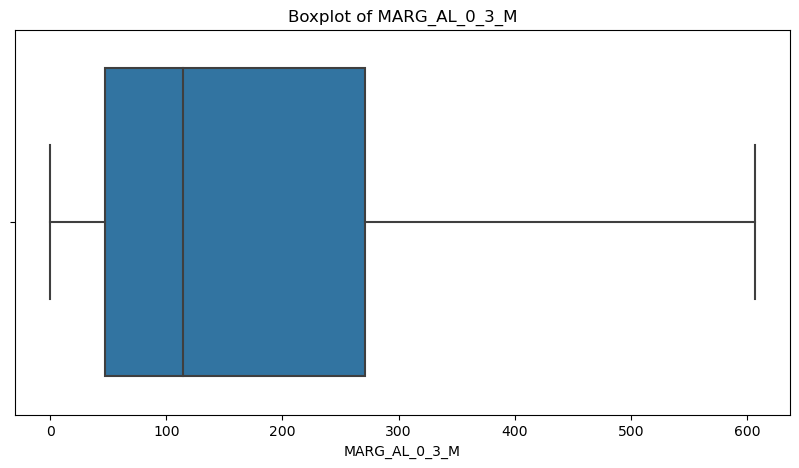

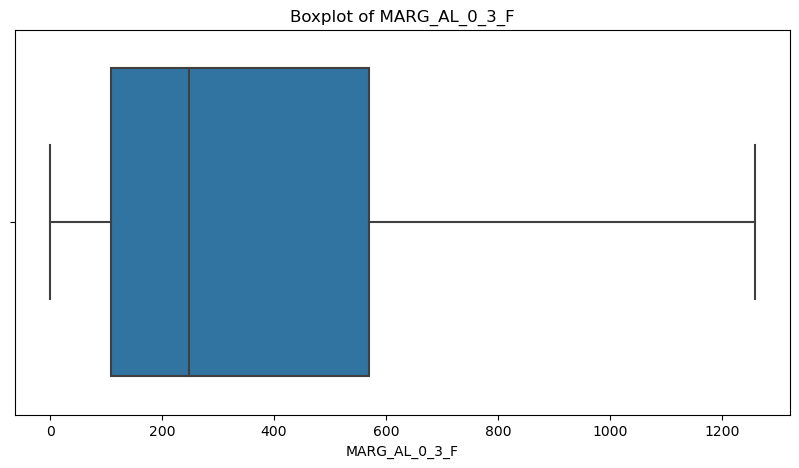

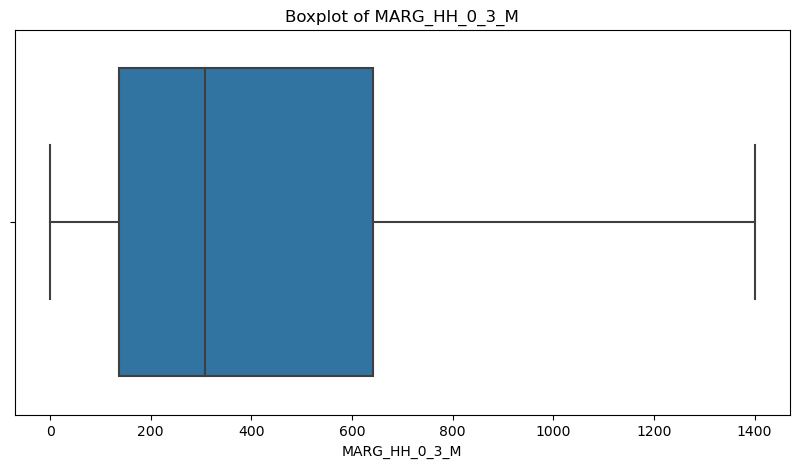

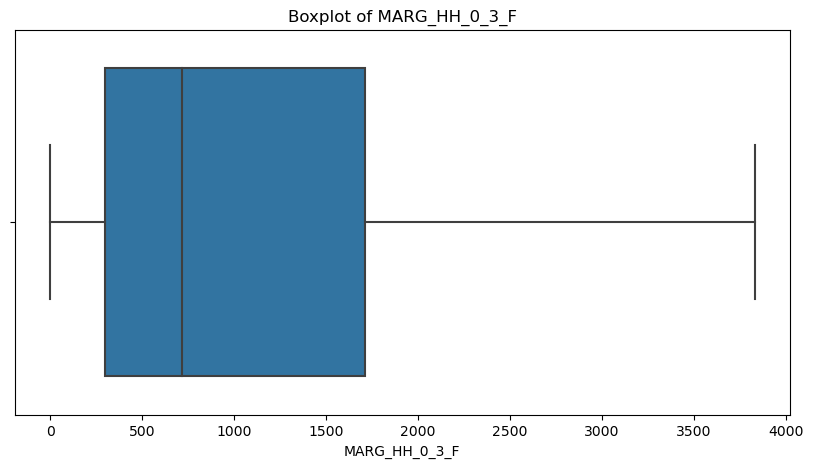

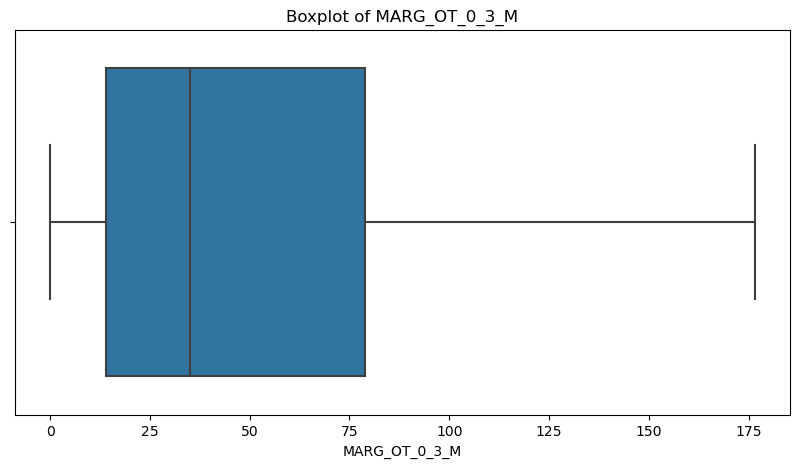

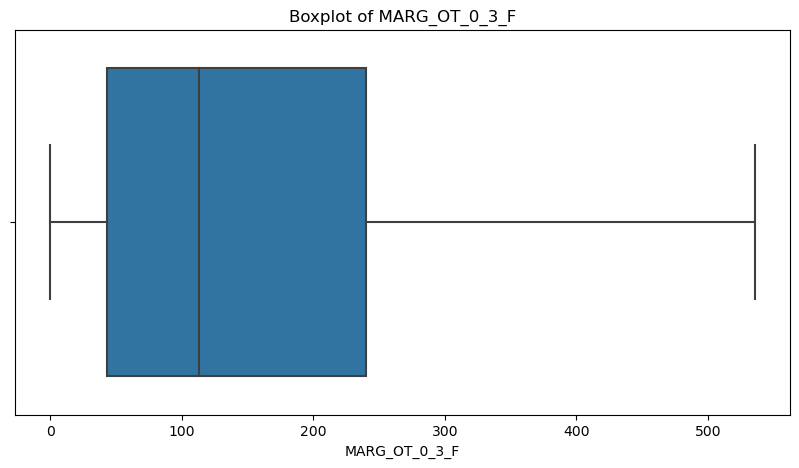

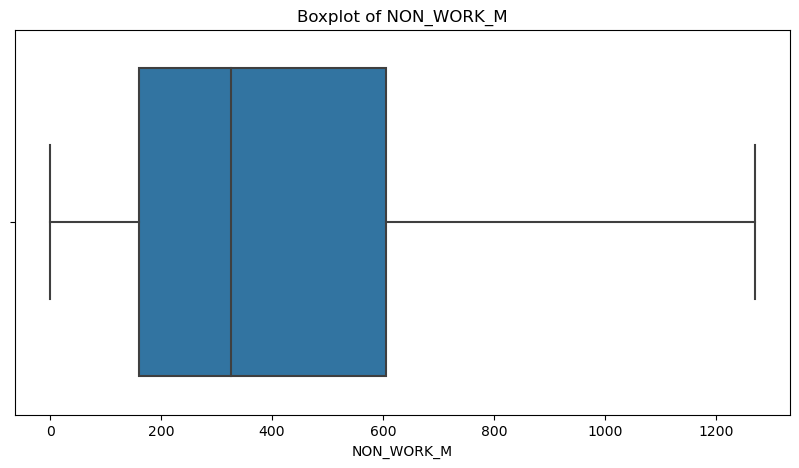

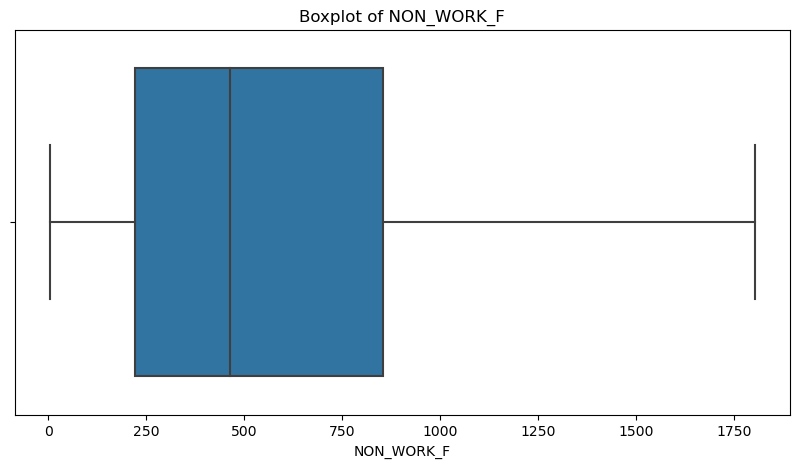

In [12]:
#let's check again 
numerical_columns = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

as we can see we solve the outlier porblems  for 57 columns means all columns now let's explore more 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    int64  
 1   Dist.Code       640 non-null    int64  
 2   State           640 non-null    object 
 3   Area Name       640 non-null    object 
 4   No_HH           640 non-null    float64
 5   TOT_M           640 non-null    float64
 6   TOT_F           640 non-null    float64
 7   M_06            640 non-null    float64
 8   F_06            640 non-null    float64
 9   M_SC            640 non-null    float64
 10  F_SC            640 non-null    float64
 11  M_ST            640 non-null    float64
 12  F_ST            640 non-null    float64
 13  M_LIT           640 non-null    float64
 14  F_LIT           640 non-null    float64
 15  M_ILL           640 non-null    float64
 16  F_ILL           640 non-null    float64
 17  TOT_WORK_M      640 non-null    flo

In [14]:
# Dropping the columns temporarily
temp_df = df.drop(columns=['State Code', 'Dist.Code'])

# Checking for duplicates
dupli = temp_df.duplicated()
print('Number of duplicates = %d' % (dupli.sum()))


Number of duplicates = 0


as we can see we don't have any duplicate (rows) values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    int64  
 1   Dist.Code       640 non-null    int64  
 2   State           640 non-null    object 
 3   Area Name       640 non-null    object 
 4   No_HH           640 non-null    float64
 5   TOT_M           640 non-null    float64
 6   TOT_F           640 non-null    float64
 7   M_06            640 non-null    float64
 8   F_06            640 non-null    float64
 9   M_SC            640 non-null    float64
 10  F_SC            640 non-null    float64
 11  M_ST            640 non-null    float64
 12  F_ST            640 non-null    float64
 13  M_LIT           640 non-null    float64
 14  F_LIT           640 non-null    float64
 15  M_ILL           640 non-null    float64
 16  F_ILL           640 non-null    float64
 17  TOT_WORK_M      640 non-null    flo

now we are going to drop categorical/non needed columns and scale our data with minmaxscaler 

In [16]:
# Importing the necessary library for scaling
from sklearn.preprocessing import MinMaxScaler

# Saving the columns we'll drop temporarily
temp_df = df[['State Code', 'Dist.Code', 'State', 'Area Name']].copy()

# Dropping the specified columns
df.drop(['State Code', 'Dist.Code', 'State', 'Area Name'], axis=1, inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_scaled_values = scaler.fit_transform(df)

# Update the df with the scaled values
df[df.columns] = df_scaled_values

# When you want to rejoin the temporarily removed columns:
# df = pd.concat([temp_df, df], axis=1)


In [17]:
#to check is it working or not 
df.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.051572,0.102636,0.085543,0.170045,0.187818,0.000069,0.000000,0.106873,0.085023,0.080465,...,0.323113,0.095440,0.296846,0.188338,0.485628,0.065798,0.181303,0.085901,0.203190,0.116240
1,0.041134,0.085663,0.065864,0.129627,0.112477,0.000161,0.000093,0.022829,0.016920,0.062842,...,0.146895,0.090927,0.202845,0.181981,0.132833,0.038644,0.430595,0.332400,0.110258,0.086207
2,0.028755,0.027470,0.030180,0.030049,0.029427,0.000069,0.000093,0.310409,0.318199,0.026103,...,0.031014,0.020973,0.072562,0.070726,0.002142,0.008878,0.000000,0.007470,0.052766,0.031146
3,0.006800,0.010680,0.010313,0.014849,0.018996,0.000000,0.000000,0.142533,0.129858,0.009561,...,0.053570,0.028805,0.100598,0.101718,0.009284,0.013055,0.022663,0.018674,0.091357,0.030033
4,0.079241,0.090153,0.086087,0.149397,0.138600,0.000461,0.000511,0.410064,0.354852,0.079617,...,0.245295,0.251941,0.766852,0.828847,0.146402,0.078854,0.135977,0.196078,0.141760,0.263070


now as we can see that our data is almost ready but one last (PCA) Process is remaining so let's do this 

In [19]:
#we will get 18 columns after applying PCA process 

from sklearn.decomposition import PCA

# Making a copy of the already scaled dataset
scaled_data = df.copy()

# Initialize PCA with the number of components you want
pca = PCA(n_components=18)

# Fit and transform your data
pca_data = pca.fit_transform(scaled_data)

print("Explained Variance:", pca.explained_variance_ratio_)


Explained Variance: [0.60670036 0.13983888 0.07271542 0.05098926 0.03596037 0.02056602
 0.01734806 0.00778714 0.0068768  0.00561103 0.00473964 0.00425999
 0.00314658 0.00308286 0.00239639 0.00219523 0.00186303 0.00169176]


as we can see now we have only  18 columns/variables 

In [20]:
#let's check cumulative_variance capture by our PCA process 
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)


[0.60670036 0.74653924 0.81925466 0.87024392 0.90620429 0.92677031
 0.94411837 0.95190551 0.9587823  0.96439334 0.96913297 0.97339296
 0.97653954 0.9796224  0.98201879 0.98421402 0.98607706 0.98776882]


In [21]:
#now let's give name to our 18 columns/variables 
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-1.557144,0.146516,-0.429203,-0.364433,0.148458,0.160851,-0.094202,-0.048274,0.130871,0.116984,-0.099104,-0.018885,-0.106971,0.066595,-0.000933,-0.119258,0.000440,-0.007930
1,-1.526332,-0.021205,-0.622226,-0.508620,0.089697,-0.322183,0.056534,-0.075065,0.116443,-0.113701,-0.176876,0.152136,-0.007385,-0.131821,0.150669,0.107982,-0.029608,0.092121
2,-2.126161,-0.050831,-0.049955,0.014102,0.186112,-0.043084,-0.045315,-0.015510,0.015902,-0.073219,0.006043,-0.010687,0.139621,-0.050944,-0.029730,-0.006804,-0.019481,-0.025378
3,-2.252138,-0.181583,-0.204200,-0.204803,0.091489,0.057588,0.036078,-0.008004,-0.004418,-0.019812,-0.048764,-0.042800,0.003773,-0.055437,-0.018709,-0.006139,0.037775,0.003073
4,-1.452496,0.736784,-0.273761,0.359407,0.299113,-0.019910,0.056010,-0.193615,0.013534,0.225876,-0.087730,-0.154390,-0.180910,-0.282212,0.094102,-0.056857,-0.042748,0.079167


our project is finish here, as we can see data values is not in -1 to +1 cause after pca it is normally happens 